# Graphs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
def read_files_to_dfs(direction, custar_suffix):
    """
    Reads data from specified files and transforms it into Pandas DataFrames.

    This function reads two types of files: 'glo_obs_post__' and 'glo_obs_post_alt__',
    both of which are expected to have a specific suffix and direction in their filenames.
    The data from these files is loaded into numpy arrays and then converted into Pandas DataFrames.
    Each DataFrame is structured with specific columns based on the file content.

    Parameters:
    - direction (str): A string parameter that specifies the direction of the wind (forward or backward).
    - custar_suffix (str): A string parameter that defines the custom c/u* (2,4 or 8).

    Returns:
    - df_glo_obs (DataFrame): A DataFrame containing data from the 'glo_obs_post__' file.
      Columns include 'istep', 'time', 'ak', 'mf_px', 'mf_py', 'mf_pz', 'en_p', 'en_v'.
      The 'time' column is adjusted to start from 0.
    - df_glo_obs_alt (DataFrame): A DataFrame containing data from the 'glo_obs_post_alt__' file.
      Columns include 'istep', 'time', 'mf_px_alt', 'mf_vx_alt'.
      Similar to df_glo_obs, the 'time' column in this DataFrame is also adjusted to start from 0, it doesn't start in 0 directly because we use a precursor for the turbulence

    """

    # Reading the glo_obs file
    filename_glo = f"glo_obs_post__{direction}_{custar_suffix}.out"
    data_glo_obs = np.loadtxt(filename_glo)
    df_glo_obs = pd.DataFrame(data_glo_obs, columns=['istep', 'time', 'ak', 'mf_px', 'mf_py', 'mf_pz', 'en_p', 'en_v'])
    
    # Adjust the 'time' column to start from 0
    df_glo_obs['time'] = df_glo_obs['time'] - df_glo_obs['time'].iloc[0]

    # Reading the glo_obs_alt file
    filename_glo_alt = f"glo_obs_post_alt__{direction}_{custar_suffix}.out"
    data_glo_obs_alt = np.loadtxt(filename_glo_alt)
    df_glo_obs_alt = pd.DataFrame(data_glo_obs_alt, columns=['istep', 'time', 'mf_px_alt', 'mf_vx_alt'])
    
    # Adjust the 'time' column in the alt DataFrame to start from 0
    df_glo_obs_alt['time'] = df_glo_obs_alt['time'] - df_glo_obs_alt['time'].iloc[0]

    return df_glo_obs, df_glo_obs_alt


# Example
df_glo_obs_forward_custar2, df_glo_obs_alt_forward_custar2 = read_files_to_dfs("forward", "2")
df_glo_obs_backward_custar2, df_glo_obs_alt_backward_custar2 = read_files_to_dfs("backward", "2")

df_glo_obs_forward_custar4, df_glo_obs_alt_forward_custar4 = read_files_to_dfs("forward", "4")
df_glo_obs_backward_custar4, df_glo_obs_alt_backward_custar4 = read_files_to_dfs("backward", "4")

df_glo_obs_forward_custar8, df_glo_obs_alt_forward_custar8 = read_files_to_dfs("forward", "8")
df_glo_obs_backward_custar8, df_glo_obs_alt_backward_custar8 = read_files_to_dfs("backward", "8")


## Example with one case

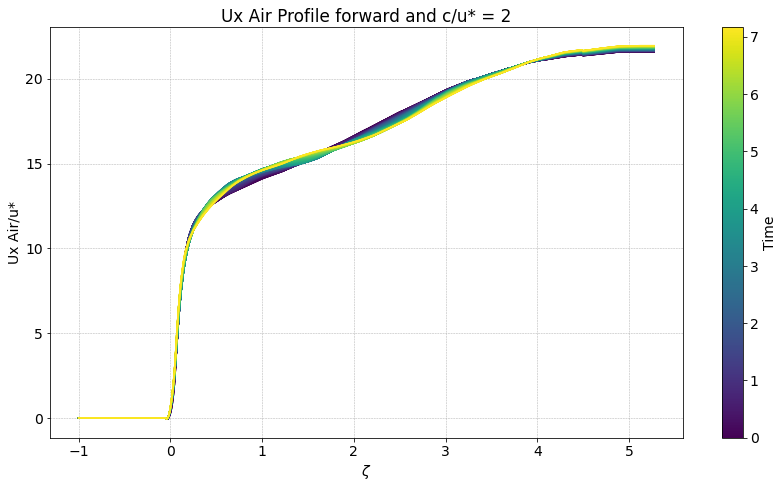

In [4]:
# Data
istep = df_glo_obs_forward_custar2['istep']
time = df_glo_obs_forward_custar2['time']
direction = "forward"
custar_suffix = 2

# Configuration figure 
plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 14  # font size
plt.rcParams['savefig.dpi'] = 300  # resolution for saving

# Colors for the time
cmap = plt.cm.viridis
norm = plt.Normalize(min(time), max(time))

for i, t in zip(istep, time):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"wave_coord_{direction}_{custar_suffix}/prof_wf_{direction}_{custar_suffix}{formatted_i}.out"
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        zeta_air = data_wf[:, 0]
        ux_air_1d_wf = data_wf[:, 2]
        plt.plot(zeta_air, ux_air_1d_wf/0.25, color=cmap(norm(t)))

# Configuración final de la gráfica
plt.title(f'Ux Air Profile {direction} and c/u* = {custar_suffix}')
plt.xlabel("$\zeta$")
plt.ylabel(r'$\langle u_a \rangle /u_*$') 

# Barra de colores que refleja el tiempo
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Time")

# Mostrar la gráfica
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


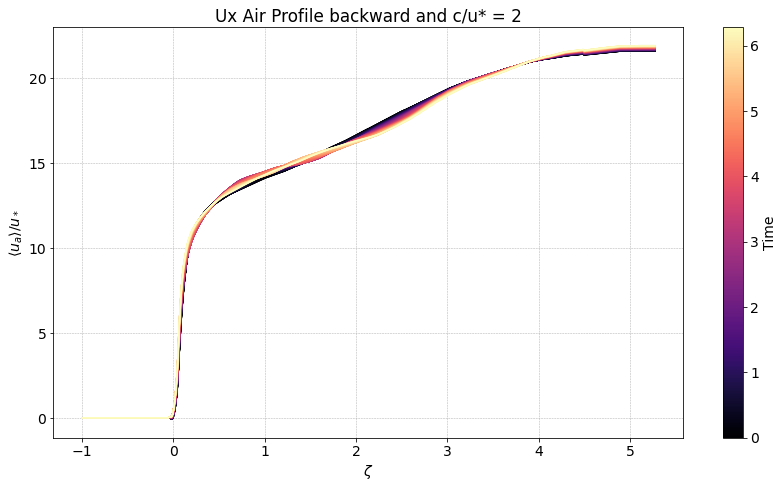

In [5]:

# Data
istep = df_glo_obs_backward_custar2['istep']
time = df_glo_obs_backward_custar2['time']
direction = "backward"
custar_suffix = 2

# Configuration
plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 14  
plt.rcParams['savefig.dpi'] = 300 

# Configuración del colormap y normalización para los valores de tiempo
cmap = plt.cm.magma
norm = plt.Normalize(min(time), max(time))

for i, t in zip(istep, time):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"wave_coord_{direction}_{custar_suffix}/prof_wf_{direction}_{custar_suffix}{formatted_i}.out"
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        zeta_air = data_wf[:, 0]
        ux_air_1d_wf = data_wf[:, 2]
        plt.plot(zeta_air, ux_air_1d_wf/0.25, color=cmap(norm(t)))

# Configuración final de la gráfica
plt.title(f'Ux Air Profile {direction} and c/u* = {custar_suffix}')
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$\langle u_a \rangle /u_*$') 

# Barra de colores que refleja el tiempo
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label="Time")

# Mostrar la gráfica
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


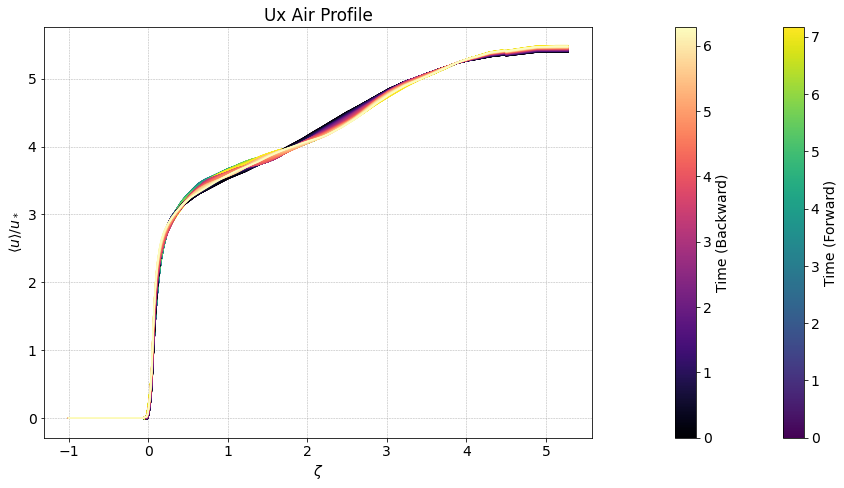

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración de la figura y eje
fig, ax = plt.subplots(figsize=(12, 7))
plt.rcParams['font.size'] = 14  # Aumentar el tamaño de la fuente
plt.rcParams['savefig.dpi'] = 300  # Mayor resolución al guardar

# Datos y plot para "forward"
istep_forward = df_glo_obs_forward_custar2['istep']
time_forward = df_glo_obs_forward_custar2['time']
direction_forward = "forward"
custar_suffix = 2

# Configuración del colormap y normalización para los valores de tiempo (Forward)
cmap_forward = plt.cm.viridis
norm_forward = plt.Normalize(min(time_forward), max(time_forward))

for i, t in zip(istep_forward, time_forward):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"wave_coord_{direction_forward}_{custar_suffix}/prof_wf_{direction_forward}_{custar_suffix}{formatted_i}.out"
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        zeta_air = data_wf[:, 0]
        ux_air_1d_wf = data_wf[:, 2]
        ax.plot(zeta_air, ux_air_1d_wf, color=cmap_forward(norm_forward(t)))

# Datos y plot para "backward"
istep_backward = df_glo_obs_backward_custar2['istep']
time_backward = df_glo_obs_backward_custar2['time']
direction_backward = "backward"

# Configuración del colormap y normalización para los valores de tiempo (Backward)
cmap_backward = plt.cm.magma
norm_backward = plt.Normalize(min(time_backward), max(time_backward))

for i, t in zip(istep_backward, time_backward):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"wave_coord_{direction_backward}_{custar_suffix}/prof_wf_{direction_backward}_{custar_suffix}{formatted_i}.out"
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        zeta_air = data_wf[:, 0]
        ux_air_1d_wf = data_wf[:, 2]
        ax.plot(zeta_air, ux_air_1d_wf, color=cmap_backward(norm_backward(t)))

# Configuración final de la gráfica
ax.set_title("Ux Air Profile")
plt.xlabel(r'$\zeta$')
plt.ylabel(r'$\langle u \rangle /u_*$') 

# Barra de colores que refleja el tiempo para forward y backward
sm1 = plt.cm.ScalarMappable(cmap=cmap_forward, norm=norm_forward)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax, label="Time (Forward)", orientation='vertical', pad=0.1, fraction=0.046)

sm2 = plt.cm.ScalarMappable(cmap=cmap_backward, norm=norm_backward)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax, label="Time (Backward)", orientation='vertical', pad=0.125, fraction=0.046)

plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



## More generic plot for different cases 

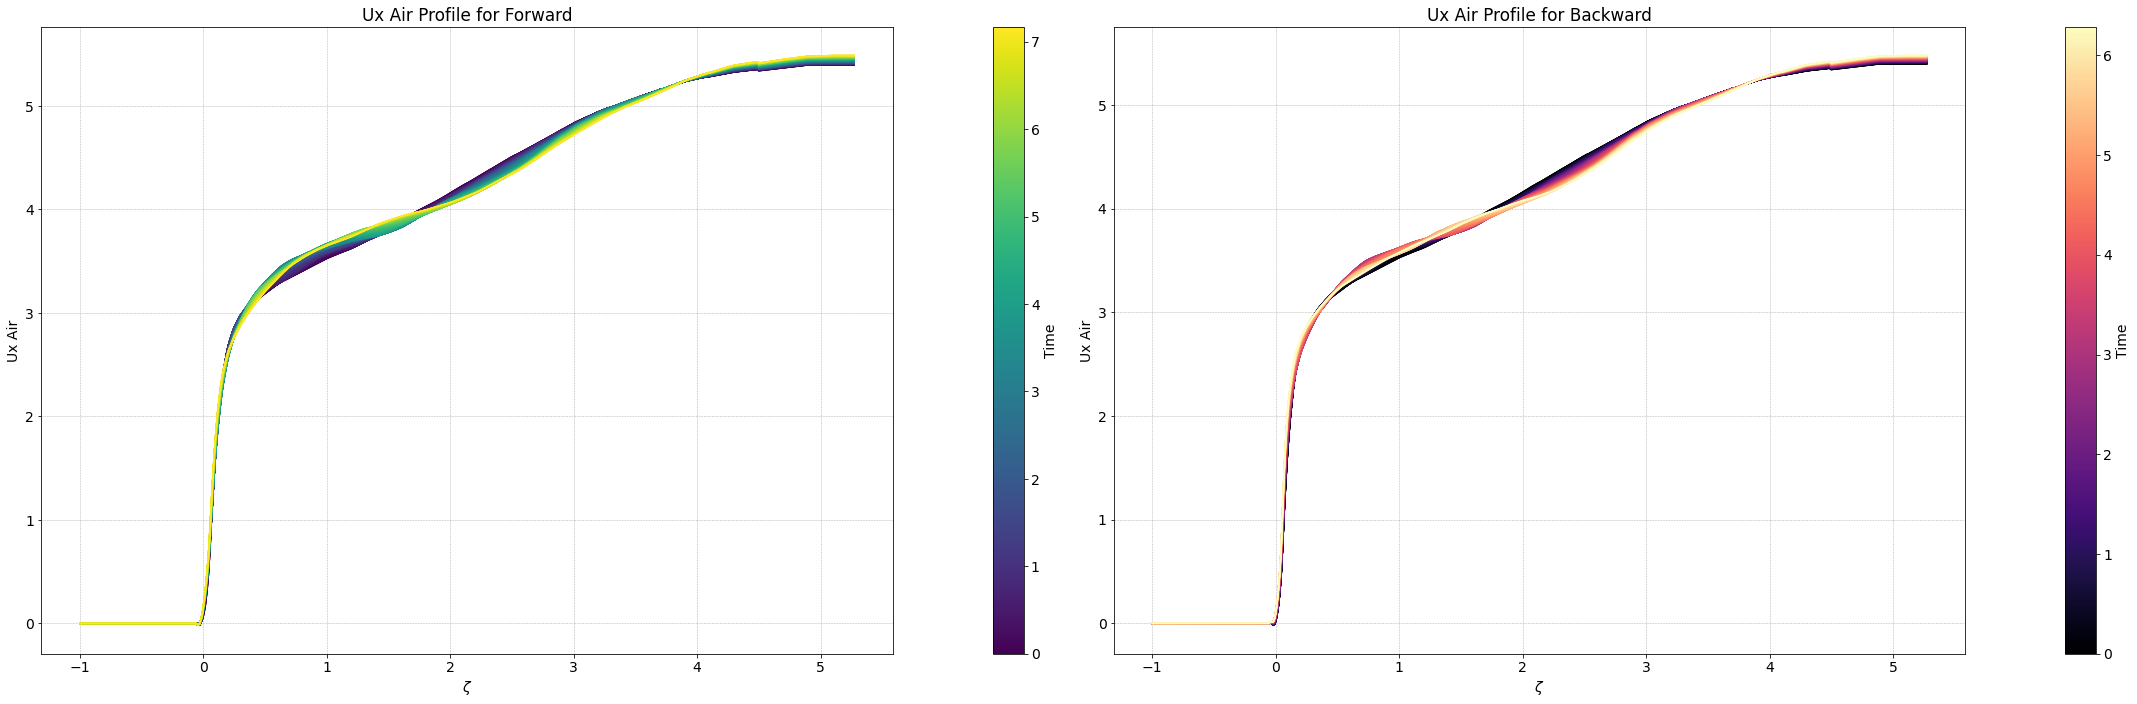

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 10))
plt.rcParams['font.size'] = 14  
plt.rcParams['savefig.dpi'] = 300 

custar_suffix = 2

def plot_data_air(ax, istep, time, direction, cmap, norm, custar_suffix):
    """
    Plots air property data for various time steps on a matplotlib Axes.

    Parameters:
    - ax (matplotlib.axes.Axes): Axes object for plotting.
    - istep (iterable): Time steps for data files.
    - time (iterable): Corresponding time values for color mapping.
    - direction (str): Direction part of the filename.
    - cmap (Colormap): Colormap for plot colors.
    - norm (Normalize): Normalization for time values.
    - custar_suffix (str): Suffix for the filename.

    The function reads data from specified files, extracts air properties,
    and plots them on 'ax'. Each time step's data is colored using 'cmap'
    and 'norm' based on the corresponding time value.
    """
    for i, t in zip(istep, time):
        formatted_i = f"{int(i):09d}"
        filename_wf = f"wave_coord_{direction}_{custar_suffix}/prof_wf_{direction}_{custar_suffix}{formatted_i}.out"
        if os.path.exists(filename_wf):
            data_wf = np.loadtxt(filename_wf)
            zeta_air = data_wf[:, 0]
            ux_air_1d_wf = data_wf[:, 2]
            ax.plot(zeta_air, ux_air_1d_wf, color=cmap(norm(t)))

# Data and plot "forward"
istep_forward = df_glo_obs_forward_custar2['istep']
time_forward = df_glo_obs_forward_custar2['time']
cmap_forward = plt.cm.viridis
norm_forward = plt.Normalize(min(time_forward), max(time_forward))
plot_data_air(ax1, istep_forward, time_forward, "forward", cmap_forward, norm_forward, custar_suffix)

# Data and plot "backward"
istep_backward = df_glo_obs_backward_custar2['istep']
time_backward = df_glo_obs_backward_custar2['time']
cmap_backward = plt.cm.magma
norm_backward = plt.Normalize(min(time_backward), max(time_backward))
plot_data_air(ax2, istep_backward, time_backward, "backward", cmap_backward, norm_backward , custar_suffix)

# Configuration
ax1.set_title("Ux Air Profile for Forward")
ax2.set_title("Ux Air Profile for Backward")
ax1.set_xlabel(r'$\zeta$')
ax2.set_xlabel(r'$\zeta$')
ax1.set_ylabel("Ux Air")
ax2.set_ylabel("Ux Air")

# Colorbars
sm1 = plt.cm.ScalarMappable(cmap=cmap_forward, norm=norm_forward)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=ax1, label="Time", orientation='vertical', pad=0.1, fraction=0.046)

sm2 = plt.cm.ScalarMappable(cmap=cmap_backward, norm=norm_backward)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax2, label="Time", orientation='vertical', pad=0.1, fraction=0.046)

plt.tight_layout()
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



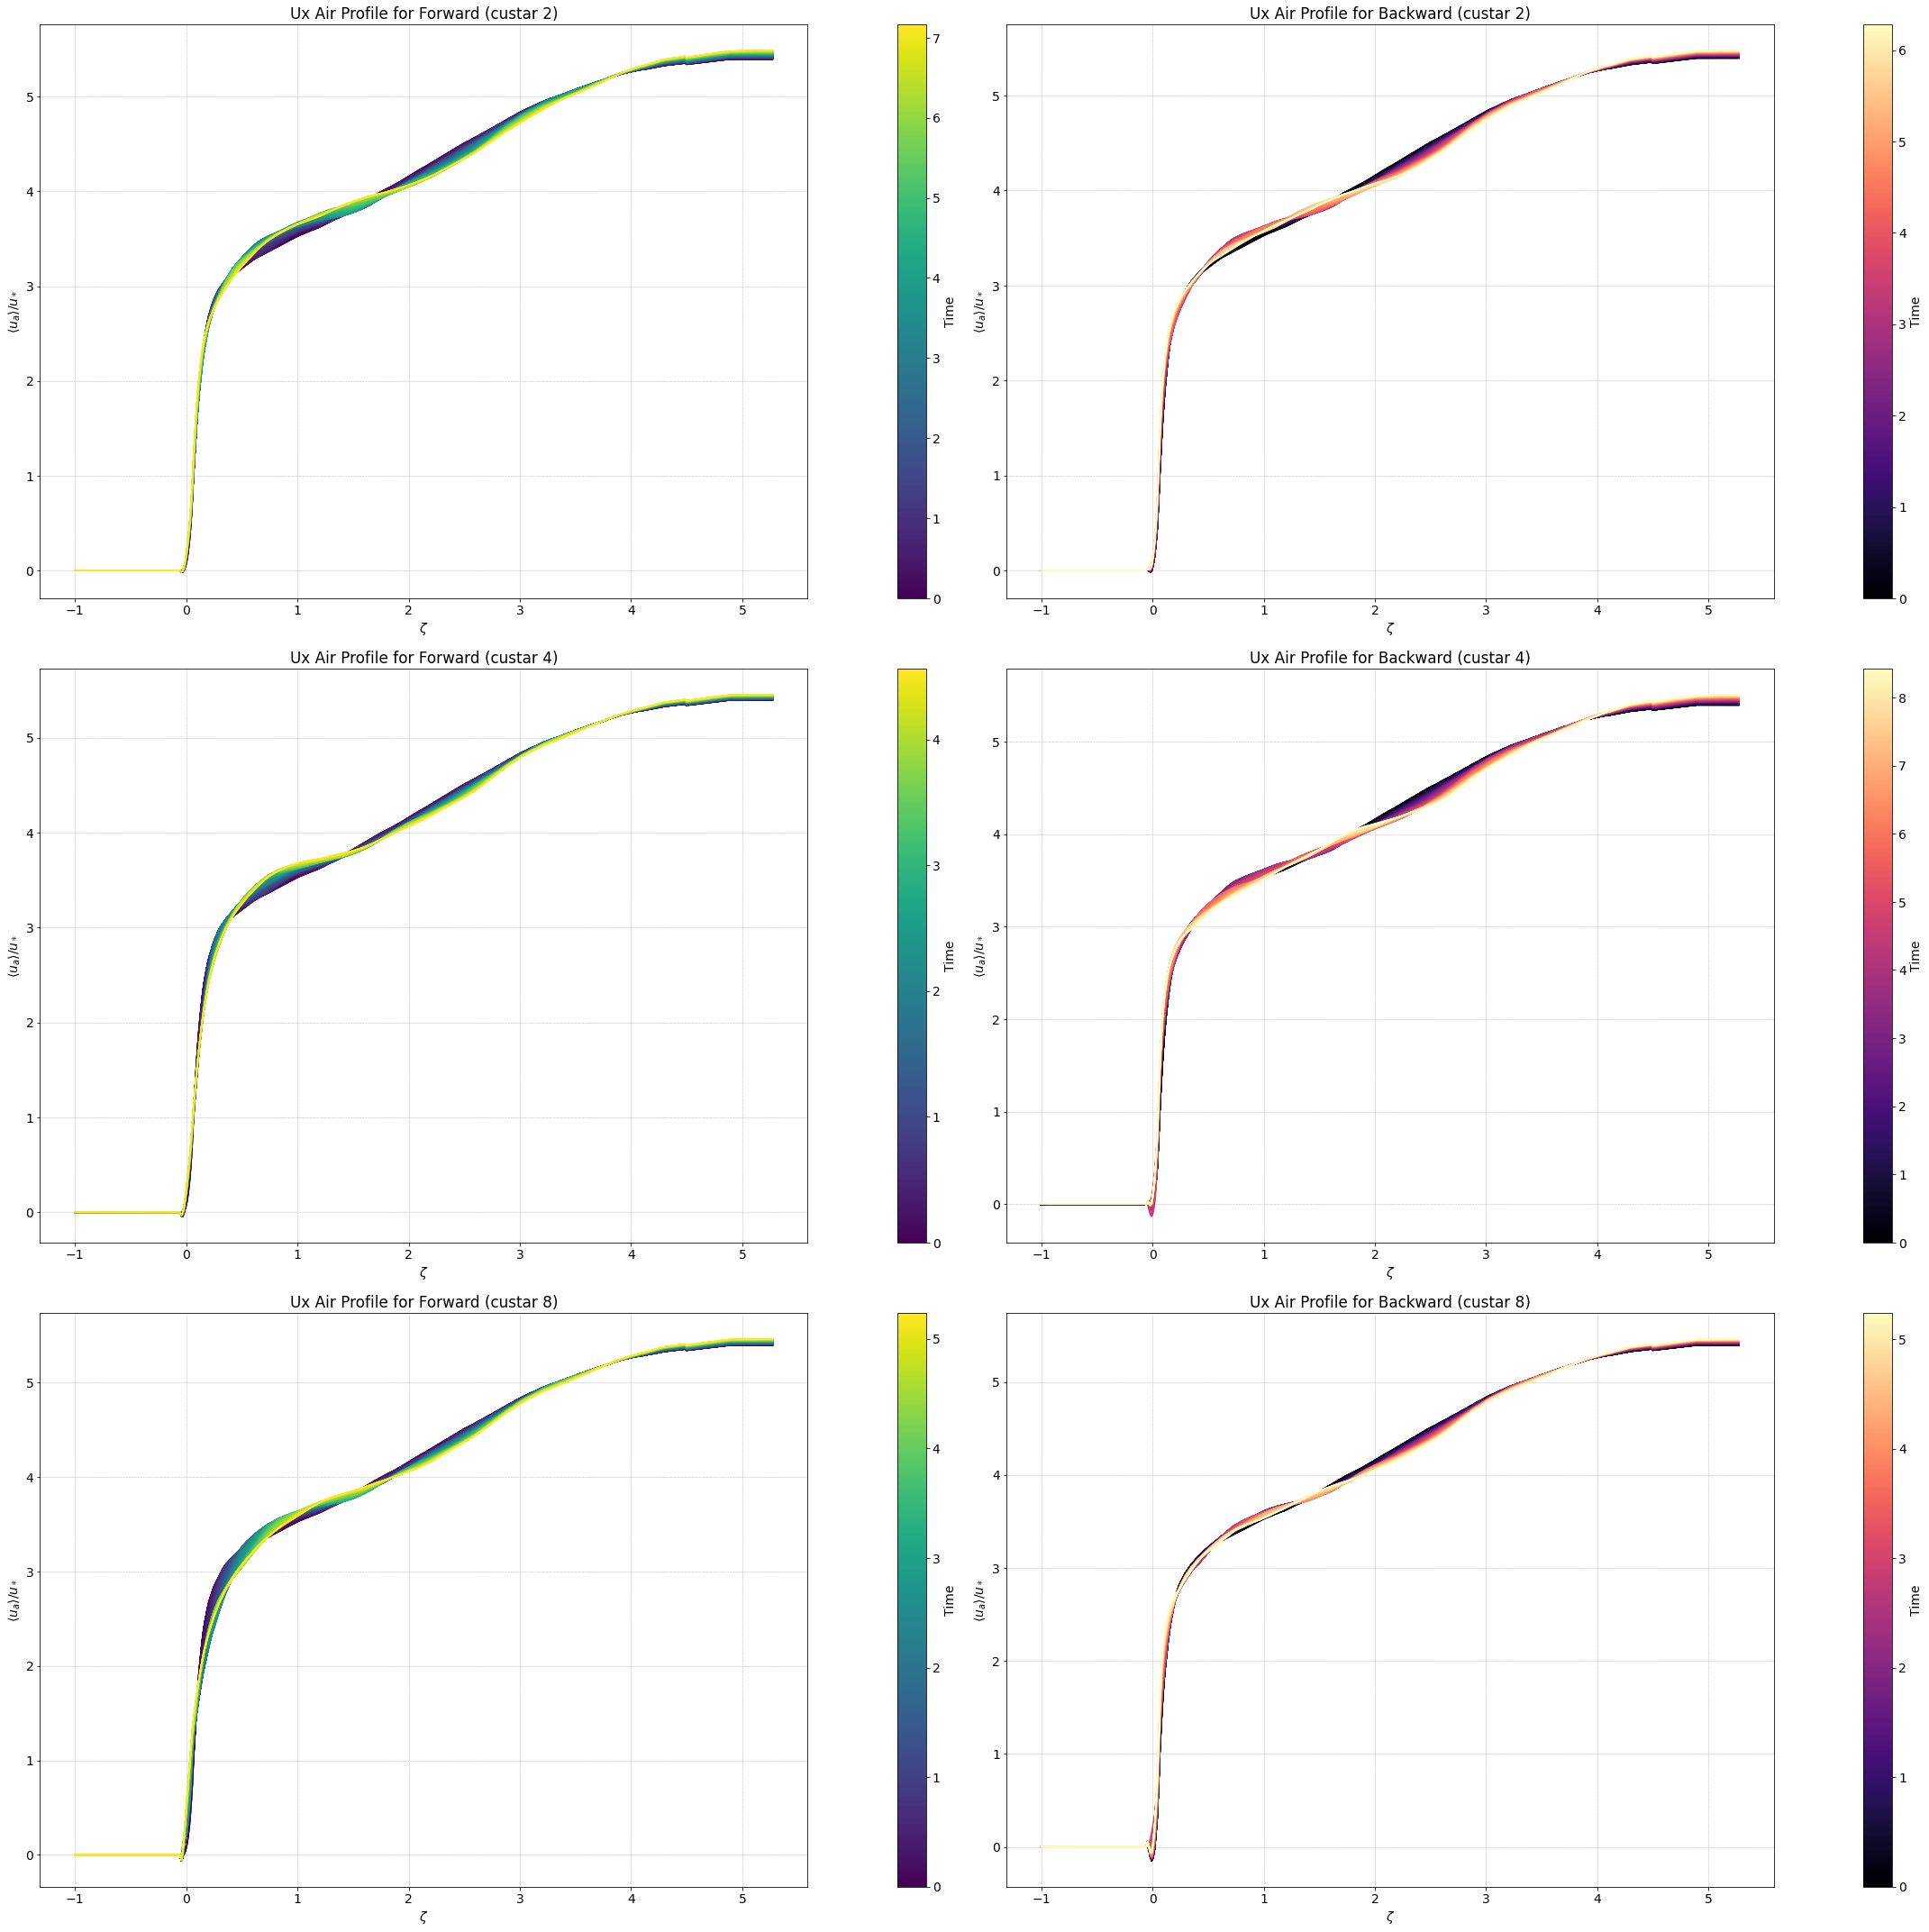

In [9]:
# Figure and axes 
# Creating a figure with 3 rows and 2 columns of subplots, each subplot for a combination of custar_suffix and direction
fig, axes = plt.subplots(3, 2, figsize=(30, 30)) 

# Setting global plot parameters: font size and resolution
plt.rcParams['font.size'] = 14  
plt.rcParams['savefig.dpi'] = 300

# List of suffixes and directions for the cases to be plotted
custar_suffixes = ["2", "4", "8"]
directions = ["forward", "backward"]

# Looping over each combination of custar_suffix and direction
for i, custar_suffix in enumerate(custar_suffixes):
    for j, direction in enumerate(directions):
        # Accessing the subplot for the current combination
        ax = axes[i, j]

        # Reading data for the current combination of direction and custar_suffix
        df_glo_obs, df_glo_obs_alt = read_files_to_dfs(direction, custar_suffix)
        
        # Extracting time steps and time values from the data
        istep = df_glo_obs['istep']
        time = df_glo_obs['time']
        
        # Choosing a colormap based on the direction
        cmap = plt.cm.viridis if direction == "forward" else plt.cm.magma
        # Setting up normalization for the colormap based on time values
        norm = plt.Normalize(min(time), max(time))
        
        # Plotting the data on the subplot
        plot_data_air(ax, istep, time, direction, cmap, norm, custar_suffix)

        # Setting title, x-label, and y-label for the subplot
        ax.set_title(f"Ux Air Profile for {direction.capitalize()} (custar {custar_suffix})")
        ax.set_xlabel(r'$\zeta$')
        ax.set_ylabel(r'$\langle u_a \rangle /u_*$') 

        # Adding a grid to the subplot for better readability
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        
        # Adding a colorbar for time visualization
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax, label="Time", orientation='vertical', pad=0.1, fraction=0.046)

# Adjusting the layout for clear visibility of plot elements
plt.tight_layout()
# Displaying the complete figure with all subplots
plt.show()


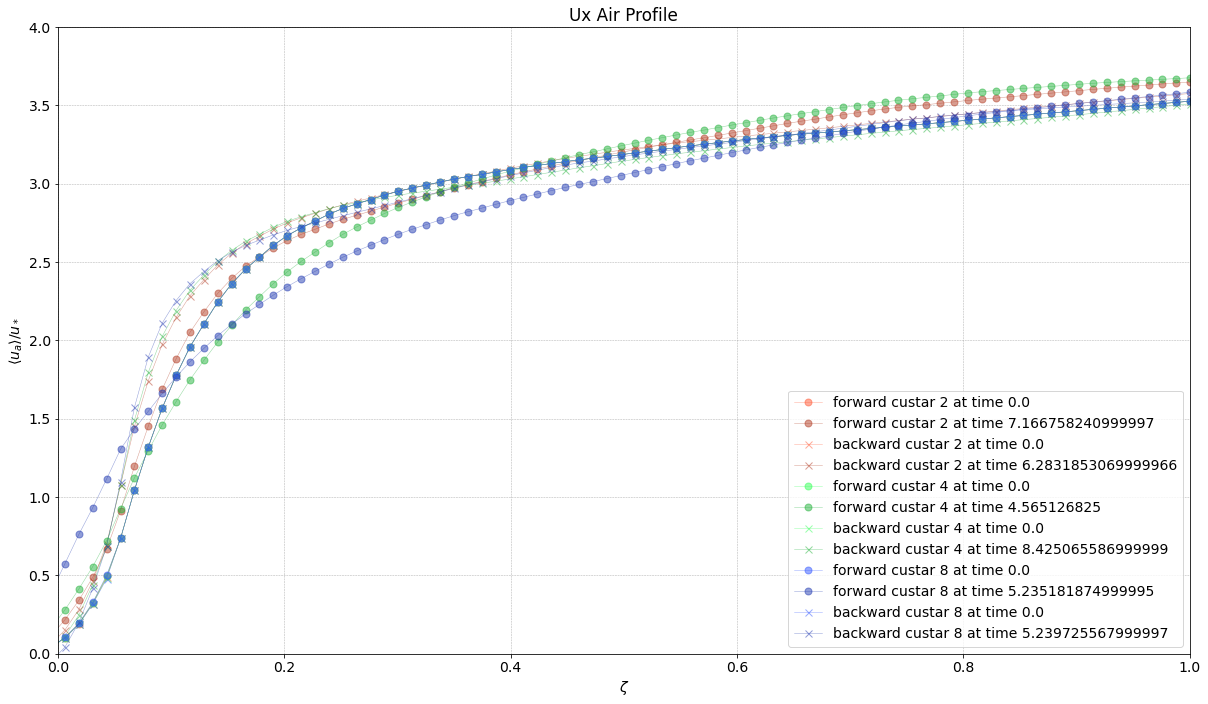

In [10]:
# Configuration of the figure
fig, ax = plt.subplots(figsize=(17, 10))
plt.rcParams['font.size'] = 14  # Set global font size
plt.rcParams['savefig.dpi'] = 300  # Set the resolution for saving images

# List of suffixes and directions for plotting
custar_suffixes = ["2", "4", "8"]
directions = ["forward", "backward"]

# Custom colors for each custar_suffix
colors = {
    "2": "#FF5733",  # Modified red color
    "4": "#33FF57",  # Modified green color
    "8": "#3357FF"   # Modified blue color
}

def darken_color(color, factor=0.7):
    """ Darkens a given hexadecimal color. """
    r, g, b = int(color[1:3], 16), int(color[3:5], 16), int(color[5:7], 16)
    r = int(r * factor)
    g = int(g * factor)
    b = int(b * factor)
    return f"#{r:02x}{g:02x}{b:02x}"

def plot_data_air_color(ax, istep, time, direction, color, marker, custar_suffix):
    """ Plot data with specific color and marker based on direction and custar_suffix. """
    for i, t in zip(istep, time):
        formatted_i = f"{int(i):09d}"
        filename_wf = f"wave_coord_{direction}_{custar_suffix}/prof_wf_{direction}_{custar_suffix}{formatted_i}.out"
        if os.path.exists(filename_wf):
            data_wf = np.loadtxt(filename_wf)
            zeta_air = data_wf[:, 0]
            ux_air_1d_wf = data_wf[:, 2]
            label = f"{direction} custar {custar_suffix} at time {t}"
            # Darken the color for the last time step
            if t == time[-1]:
                color = darken_color(color)
            ax.plot(zeta_air, ux_air_1d_wf, color=color, marker=marker, markersize=7, label=label, linewidth=0.5, alpha=0.5)

# Define different symbols for forward and backward directions
markers = {"forward": "o", "backward": "x"}

# Loop over each custar_suffix and direction combination
for custar_suffix in custar_suffixes:
    for _, direction in enumerate(directions):
        # Read data and extract relevant columns
        df_glo_obs, _ = read_files_to_dfs(direction, custar_suffix)
        istep = df_glo_obs['istep']
        time = df_glo_obs['time']
        # Select only the first and last time for plotting
        times_to_plot = [time.iloc[0], time.iloc[-1]]
        isteps_to_plot = [istep.iloc[0], istep.iloc[-1]]
        # Plot data with the specific color and marker
        plot_data_air_color(ax, isteps_to_plot, times_to_plot, direction, colors[custar_suffix], markers[direction], custar_suffix)

# Setting title, x-label, and y-label for the plot
ax.set_title("Ux Air Profile")
ax.set_xlabel(r'$\zeta$')
ax.set_ylabel(r'$\langle u_a \rangle /u_*$')
# Setting the x and y limits for the plot
ax.set_xlim([0,1])
ax.set_ylim([0,4])
# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust layout and display legend
plt.tight_layout()
plt.legend()
# Display the plot
plt.show()



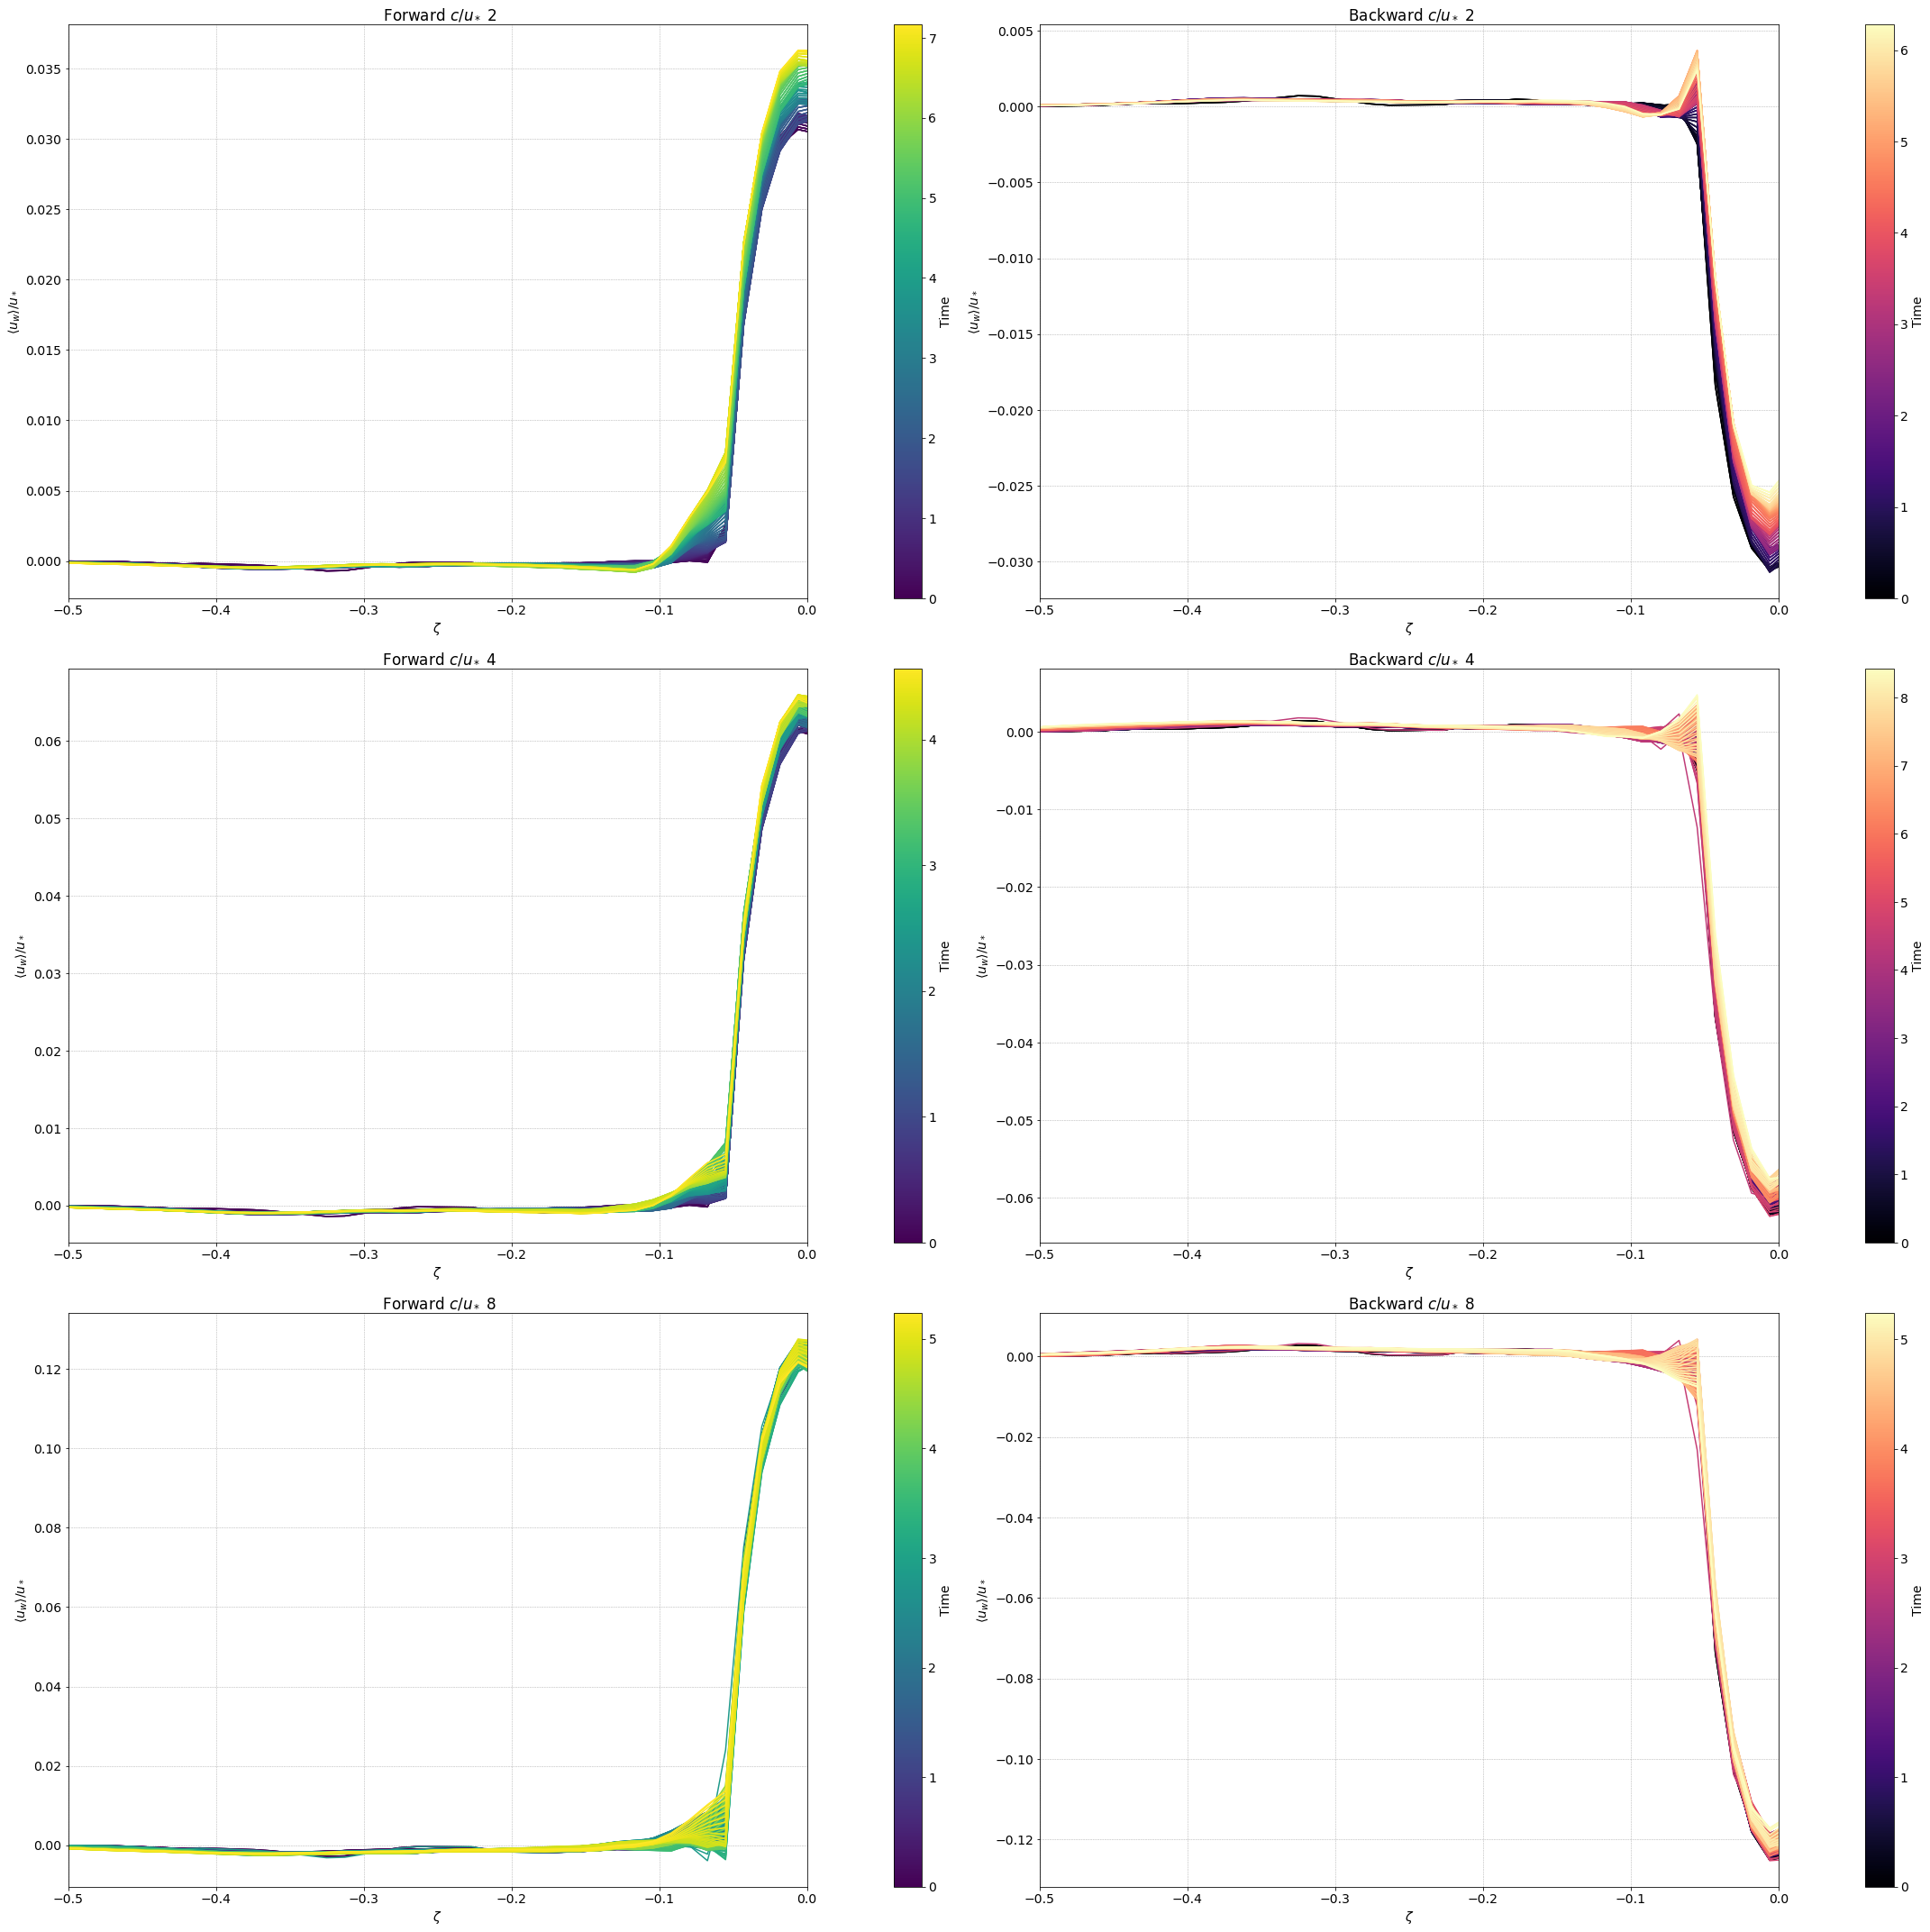

In [13]:
# Configuration of the figure and axes
fig, axes = plt.subplots(3, 2, figsize=(30, 30))
plt.rcParams['font.size'] = 14  # Setting the font size for the plot
#plt.rcParams['savefig.dpi'] = 300 

# List of suffixes and directions to be considered in the plots
custar_suffixes = ["2", "4", "8"]
directions = ["forward", "backward"]

# Function to plot water data on a specific axis
def plot_water_data(ax, istep, time, direction, cmap, norm, suffix):
    for i, t in zip(istep, time):
        formatted_i = f"{int(i):09d}"  # Format the timestep for file naming
        # Constructing the filename based on direction and suffix
        filename_wf = f"wave_coord_{direction}_{suffix}/prof_wf_{direction}_{suffix}{formatted_i}.out"
        # Load the data from the file
        data_wf = np.loadtxt(filename_wf)
        # Extracting water spatial coordinate and property
        zeta_water = data_wf[:, 1]
        ux_water_1d_wf = data_wf[:, 3]
        # Plot the data on the provided Axes
        ax.plot(zeta_water, ux_water_1d_wf, color=cmap(norm(t)))

# Loop over each custar_suffix and direction combination
for i, custar_suffix in enumerate(custar_suffixes):
    for j, direction in enumerate(directions):
        ax = axes[i, j]  # Access the subplot for the current combination

        # Read data for the current combination of direction and custar_suffix
        df_glo_obs, df_glo_obs_alt = read_files_to_dfs(direction, custar_suffix)
        
        # Extract time steps and time values from the data
        istep = df_glo_obs['istep']
        time = df_glo_obs['time']
        
        # Set colormap and normalization based on direction
        cmap = plt.cm.viridis if direction == "forward" else plt.cm.magma
        norm = plt.Normalize(min(time), max(time))
        
        # Plot the water data on the subplot
        plot_water_data(ax, istep, time, direction, cmap, norm, custar_suffix)

        # Set title, x-label, and y-label for the subplot
        ax.set_title(r' {} $c/u_*$ {}'.format(direction.capitalize(), custar_suffix))
        ax.set_xlabel(r'$\zeta$')
        ax.set_ylabel(r'$\langle u_w \rangle /u_*$') 

        # Adding grid for better readability and setting x-axis limits
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
        ax.set_xlim([-0.5, 0]) 
        # ax.set_ylim()  # Uncomment to set y-axis limits

        # Adding a colorbar to indicate time progression
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = fig.colorbar(sm, ax=ax, label="Time", orientation='vertical', pad=0.1, fraction=0.046)

# Adjusting the layout for clear visibility of plot elements
plt.tight_layout()
# Displaying the complete figure with all subplots
plt.show()


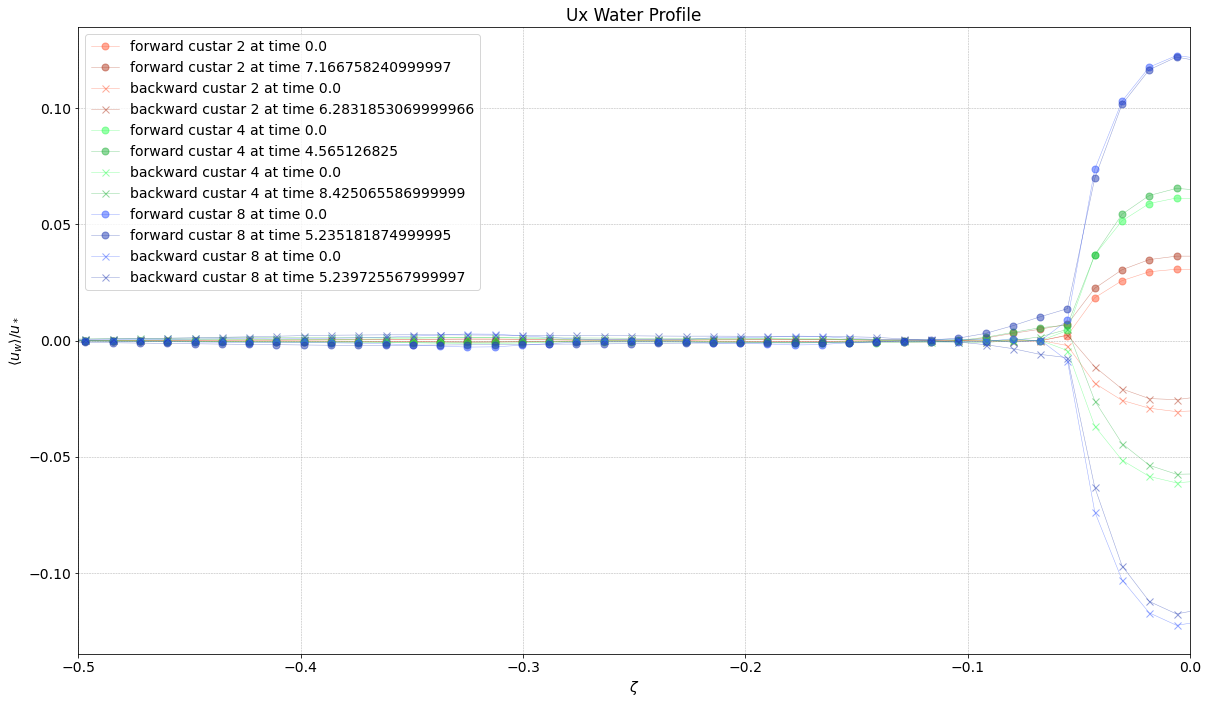

In [14]:
# Configuración de la figura
fig, ax = plt.subplots(figsize=(17, 10))
plt.rcParams['font.size'] = 14
plt.rcParams['savefig.dpi'] = 300

# Lista de casos a considerar
custar_suffixes = ["2", "4", "8"]
directions = ["forward", "backward"]

# Modificando la paleta de colores
colors = {
    "2": "#FF5733",  # Color rojo modificado
    "4": "#33FF57",  # Color verde modificado
    "8": "#3357FF"   # Color azul modificado
}

def darken_color(color, factor=0.7):
    """ Oscurece un color dado en formato hexadecimal. """
    r, g, b = int(color[1:3], 16), int(color[3:5], 16), int(color[5:7], 16)
    r = int(r * factor)
    g = int(g * factor)
    b = int(b * factor)
    return f"#{r:02x}{g:02x}{b:02x}"

def plot_data_water_color(ax, istep, time, direction, color, marker, custar_suffix):
    for i, t in zip(istep, time):
        formatted_i = f"{int(i):09d}"
        filename_wf = f"wave_coord_{direction}_{custar_suffix}/prof_wf_{direction}_{custar_suffix}{formatted_i}.out"
        if os.path.exists(filename_wf):
            data_wf = np.loadtxt(filename_wf)
            zeta_air = data_wf[:, 1]
            ux_air_1d_wf = data_wf[:, 3]
            label = f"{direction} custar {custar_suffix} at time {t}"
            # Oscurece el color si es el último tiempo
            if t == time[-1]:
                color = darken_color(color)
            ax.plot(zeta_air, ux_air_1d_wf, color=color, marker=marker, markersize=7, label=label, linewidth=0.5, alpha=0.5)

# Define diferentes símbolos para forward y backward
markers = {"forward": "o", "backward": "x"}

for custar_suffix in custar_suffixes:
    for _, direction in enumerate(directions):
        df_glo_obs, _ = read_files_to_dfs(direction, custar_suffix)
        istep = df_glo_obs['istep']
        time = df_glo_obs['time']
        # Solo toma el primer y último tiempo
        times_to_plot = [time.iloc[0], time.iloc[-1]]
        isteps_to_plot = [istep.iloc[0], istep.iloc[-1]]
        plot_data_water_color(ax, isteps_to_plot, times_to_plot, direction, colors[custar_suffix], markers[direction], custar_suffix)

ax.set_title("Ux Water Profile")
ax.set_xlabel(r'$\zeta$')
ax.set_ylabel(r'$\langle u_w \rangle /u_*$')
ax.set_xlim([-0.5,0])
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
#ax.set_ylim([0,4])

plt.tight_layout()
plt.legend()
plt.show()

# Energy Erms

$$ Erms = \rho_w g <h^2_w (x,y,t)> $$

In this part we want to plot the energy, the potencial and the kinetic. This data is contain in the folder budget 

In [15]:
# prepare data and save it 

filename_glo = 'ak0.2_Bo200_custar4/backward/budgets/en_bud_tot.out'
energy_budget_air = np.loadtxt(filename_glo)
df_energy_budget_air = pd.DataFrame(energy_budget_air, columns=['istep', 'time', 'ke/2', 'gpe', 'grad P'])

# Fp : energy input pressure 

In [16]:
# Lista de valores de custar a considerar
valores_custar = [2, 4, 8]

# Lista de direcciones a considerar
direcciones = ['forward', 'backward']

# Diccionario para almacenar DataFrames de cada combinación
dfs_air = {}

for custar in valores_custar:
    # Bucle a través de cada dirección
    for direccion in direcciones:
        # Construye el filename_glo para esta combinación
        filename_glo = f'ak0.2_Bo200_custar{custar}/{direccion}/budgets/ke_bud_air.out'
        
        # Carga los datos
        energy_budget_air = np.loadtxt(filename_glo)
        
        # Crea el DataFrame
        df_name = f'df_energy_budget_custar{custar}_{direccion}'
        dfs_air[df_name] = pd.DataFrame(energy_budget_air, columns=['istep', 'time', 'ke/2', 'gpe', 'grad P', 'tau', 'diss', 'columna_8']) 


In [19]:
#para acceder al DataFrame de 'custar4' en 'backward', usarías:
print(dfs_air['df_energy_budget_custar8_backward'])

          istep     time      ke/2        gpe    grad P       tau      diss  \
0     38.500100  30837.0  2.597984  14.812407  0.000000  0.000631  0.008820   
1     38.503168  30844.0  2.598531  14.812402 -0.704354 -0.000118  0.009634   
2     38.506236  30848.0  2.598540  14.812401 -0.487827 -0.000101  0.009613   
3     38.509304  30851.0  2.598550  14.812401 -0.314906 -0.000085  0.009610   
4     38.512372  30854.0  2.598561  14.812401 -0.277901 -0.000071  0.009613   
...         ...      ...       ...        ...       ...       ...       ...   
1709  43.749029  35769.0  2.591390  14.812407 -0.850440 -0.000089  0.015179   
1710  43.752097  35772.0  2.591378  14.812407 -0.896003 -0.000091  0.015163   
1711  43.755165  35775.0  2.591364  14.812408 -0.867980 -0.000090  0.015161   
1712  43.758233  35778.0  2.591352  14.812408 -0.907168 -0.000094  0.015147   
1713  43.761301  35781.0  2.591338  14.812409 -0.877495 -0.000093  0.015144   

      columna_8  
0      4.697486  
1      4.794754

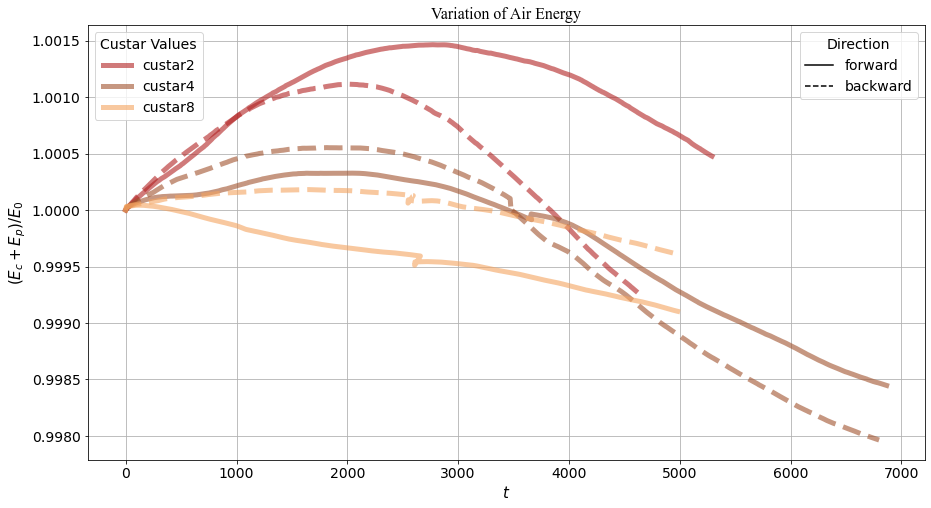

In [21]:
hfont = {'fontname':'Times New Roman'}  # Font configuration for the plot

# Define a color palette specific to each 'custar' value
color_palette = {
    'custar2': 'firebrick',
    'custar4': 'sienna',
    'custar8': 'sandybrown'
}

# Define symbols for line styles representing 'forward' and 'backward'
symbols = {
    'forward': '-',
    'backward': '--'
}

# Create the figure and axis for the plot
fig, ax = plt.subplots(figsize=(15,8))

# Initialize lists to store handles and labels for the custom legend
handles = []  # List for legend handles
labels = []   # List for legend labels

# Iterate over each DataFrame in the provided dictionary 'dfs_air'
for df_name, df in dfs_air.items():
    # Calculate relative time and total energy
    t0 = df['time'][0]
    total_energy = (df['ke/2'] + df['gpe']) / (df['ke/2'][0] + df['gpe'][0])
    
    # Determine the 'custar' value and direction from the DataFrame's name
    for custar_val, color in color_palette.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    
    # Plot the data with the corresponding color and line style
    line, = ax.plot(df['time']-t0, total_energy, symbols[direction], color=color, alpha=0.6, lw=5)

    # Add the line to the legend if it's a new 'custar' value
    if custar_val not in labels:
        handles.append(line)
        labels.append(custar_val)

# Create a legend for 'custar' values
custar_legend = ax.legend(handles=handles, labels=labels, loc="upper left", title="Custar Values")

# Create a legend for 'direction'
lines = [plt.Line2D([0], [0], color='black', linestyle=symbols['forward']),
         plt.Line2D([0], [0], color='black', linestyle=symbols['backward'])]
direction_legend = ax.legend(lines, ['forward', 'backward'], loc="upper right", title="Direction")

# Add the custar legend back (it gets overwritten by the direction legend)
ax.add_artist(custar_legend)  

# Set labels, title, and grid for the plot
ax.set_xlabel(r'$t$', **hfont, fontsize=15 )
ax.set_ylabel(r'$(E_c + E_p)/E_0$', **hfont, fontsize=15)
ax.set_title(r'Variation of Air Energy', **hfont, fontsize=16)
ax.grid(True)

# Display the plot
plt.show()



In [22]:
# List of custar values to consider
valores_custar = [2, 4, 8]

# List of directions to consider
direcciones = ['forward', 'backward']

# Dictionary to store DataFrames for each custar-direction combination
dfs_water = {}

# Loop through each custar value
for custar in valores_custar:
    # Loop through each direction
    for direccion in direcciones:
        # Build the filename for this custar-direction combination
        filename_glo = f'ak0.2_Bo200_custar{custar}/{direccion}/budgets/ke_bud_water.out'
        
        # Load the data from the file
        energy_budget_water = np.loadtxt(filename_glo)
        
        # Create a DataFrame from the loaded data
        df_name = f'df_energy_budget_custar{custar}_{direccion}'
        dfs_water[df_name] = pd.DataFrame(
            energy_budget_water, 
            columns=['istep', 'time', 'ke/2', 'gpe', 'grad P', 'tau', 'diss', 'columna_8']
        ) 


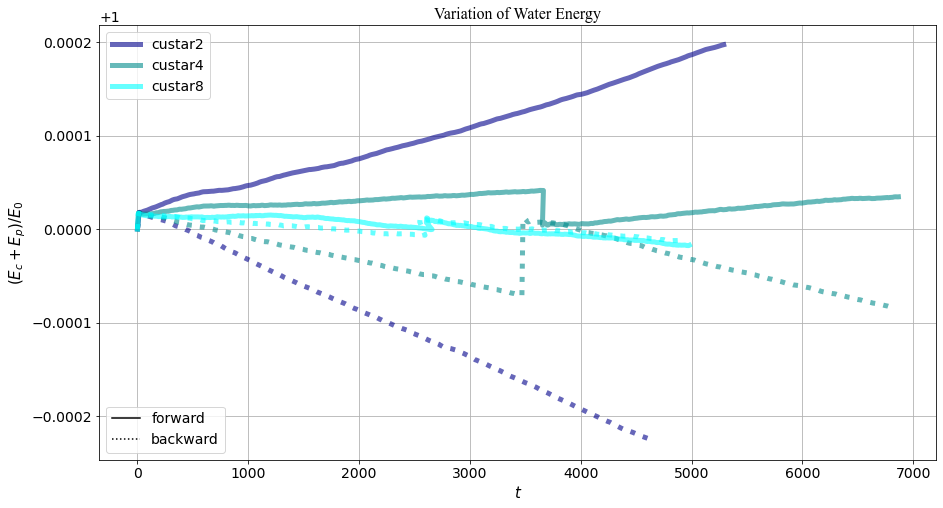

In [29]:
import matplotlib.font_manager
# Color palette specific to each 'custar' value

color_palette_blue = {
    'custar2': 'darkblue',   # darker shade
    'custar4': 'darkcyan',       # medium shade
    'custar8': 'cyan'        # lighter shade
}

# Symbols for 'forward' and 'backward'
symbols = {
    'forward': '-',
    'backward': ':'
}

# Create the figure
fig, ax = plt.subplots(figsize=(15,8))

# Plot data
handles = []  # List to store custom handles for the legend
labels = []   # List to store custom labels for the legend

# Iterate over each DataFrame in the dictionary
for df_name, df in dfs_water.items():
    t0 = df['time'][0]
    total_energy = (df['ke/2'] + df['gpe']) / (df['ke/2'][0] + df['gpe'][0])
    
    # Extract 'custar' value and direction (forward or backward) from the DataFrame name
    for custar_val, color in color_palette_blue.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    
    line, = ax.plot(df['time']-t0, total_energy, symbols[direction], color=color, alpha = 0.6, lw = 5)

    # Only add to the legend if not already added
    if custar_val not in labels:
        handles.append(line)
        labels.append(custar_val)

# Add custar legend
custar_legend = ax.legend(handles=handles, labels=labels, loc="upper left")

# Add direction legend
lines = [plt.Line2D([0], [0], color='black', linestyle=symbols['forward']),
         plt.Line2D([0], [0], color='black', linestyle=symbols['backward'])]
direction_legend = ax.legend(lines, ['forward', 'backward'], loc="lower left")
ax.add_artist(custar_legend)  # add custar legend back after it got overwritten by direction legend

# Set other plot details
ax.set_xlabel(r'$t$', **hfont, fontsize=15 )
ax.set_ylabel(r'$(E_c + E_p)/E_0$', **hfont, fontsize=15)
ax.set_title(r'Variation of Water Energy', **hfont, fontsize=16)
#ax.set_xlim([0,2600])
ax.grid(True)

plt.show()


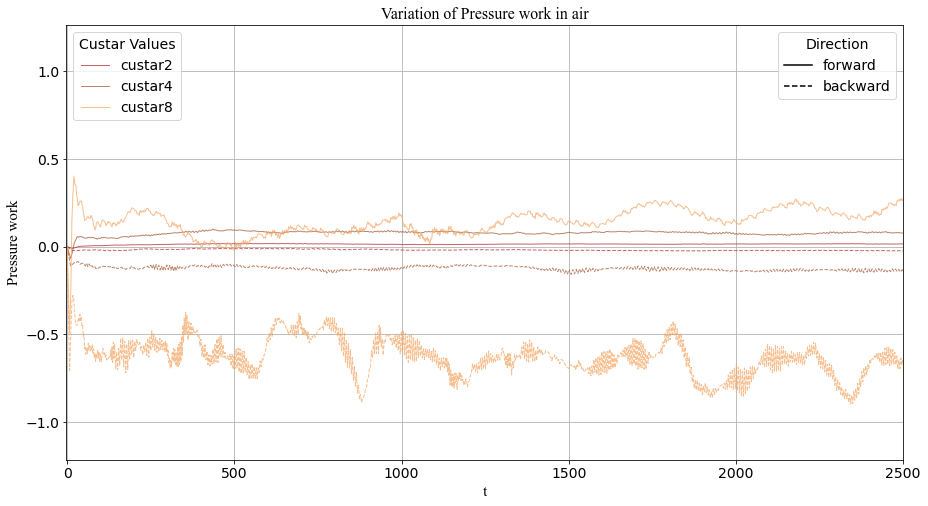

In [31]:

# Color palette specific to each 'custar' value
color_palette = {
    'custar2': 'firebrick',
    'custar4': 'sienna',
    'custar8': 'sandybrown'
}

# Symbols for 'forward' and 'backward'
symbols = {
    'forward': '-',
    'backward': '--'
}

#'grad P', 'tau', 'diss',

# Create the figure
fig, ax = plt.subplots(figsize=(15,8))

# Plot data
handles = []  # List to store custom handles for the legend
labels = []   # List to store custom labels for the legend

# Iterate over each DataFrame in the dictionary
for df_name, df in dfs_air.items():
    t0 = df['time'][0]
    pressure = (df['grad P'])
    
    # Extract 'custar' value and direction (forward or backward) from the DataFrame name
    for custar_val, color in color_palette.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    
    line, = ax.plot(df['time']-t0, pressure, symbols[direction], color=color, alpha=0.7, lw=1)

    # Only add to the legend if not already added
    if custar_val not in labels:
        handles.append(line)
        labels.append(custar_val)

# Add custar legend
custar_legend = ax.legend(handles=handles, labels=labels, loc="upper left", title="Custar Values")

# Add direction legend
lines = [plt.Line2D([0], [0], color='black', linestyle=symbols['forward']),
         plt.Line2D([0], [0], color='black', linestyle=symbols['backward'])]
direction_legend = ax.legend(lines, ['forward', 'backward'], loc="upper right", title="Direction")
ax.add_artist(custar_legend)  # add custar legend back after it got overwritten by direction legend
# Set other plot details
ax.set_xlabel(r't', **hfont, fontsize=15 )
ax.set_ylabel(r'Pressure work', **hfont, fontsize=15)
ax.set_title(r'Variation of Pressure work in air', **hfont, fontsize=16)
ax.set_xlim([-3,2500])
ax.grid(True)

plt.show()

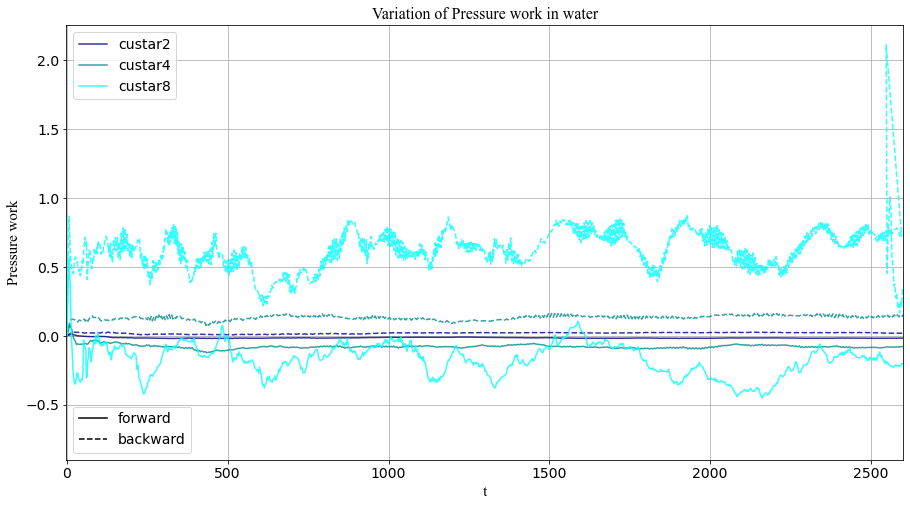

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
hfont = {'fontname':'Times New Roman'}
# Color palette specific to each 'custar' value

color_palette_blue = {
    'custar2': 'darkblue',   # darker shade
    'custar4': 'darkcyan',       # medium shade
    'custar8': 'cyan'        # lighter shade
}

# Symbols for 'forward' and 'backward'
symbols = {
    'forward': '-',
    'backward': '--'
}

# Create the figure
fig, ax = plt.subplots(figsize=(15,8))

# Plot data
handles = []  # List to store custom handles for the legend
labels = []   # List to store custom labels for the legend

# Iterate over each DataFrame in the dictionary
for df_name, df in dfs_water.items():
    t0 = df['time'][0]
    pressure = (df['grad P'])
    
    # Extract 'custar' value and direction (forward or backward) from the DataFrame name
    for custar_val, color in color_palette_blue.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    
    line, = ax.plot(df['time']-t0, pressure, symbols[direction], color=color,  alpha=0.8, lw=1.5)

    # Only add to the legend if not already added
    if custar_val not in labels:
        handles.append(line)
        labels.append(custar_val)

# Add custar legend
custar_legend = ax.legend(handles=handles, labels=labels, loc="upper left")

# Add direction legend
lines = [plt.Line2D([0], [0], color='black', linestyle=symbols['forward']),
         plt.Line2D([0], [0], color='black', linestyle=symbols['backward'])]
direction_legend = ax.legend(lines, ['forward', 'backward'], loc="lower left")
ax.add_artist(custar_legend)  # add custar legend back after it got overwritten by direction legend

# Set other plot details
ax.set_xlabel(r't', **hfont, fontsize=15 )
ax.set_ylabel(r'Pressure work', **hfont, fontsize=15)
ax.set_title(r'Variation of Pressure work in water', **hfont, fontsize=16)
ax.set_xlim([-2,2600])
ax.grid(True)

plt.show()


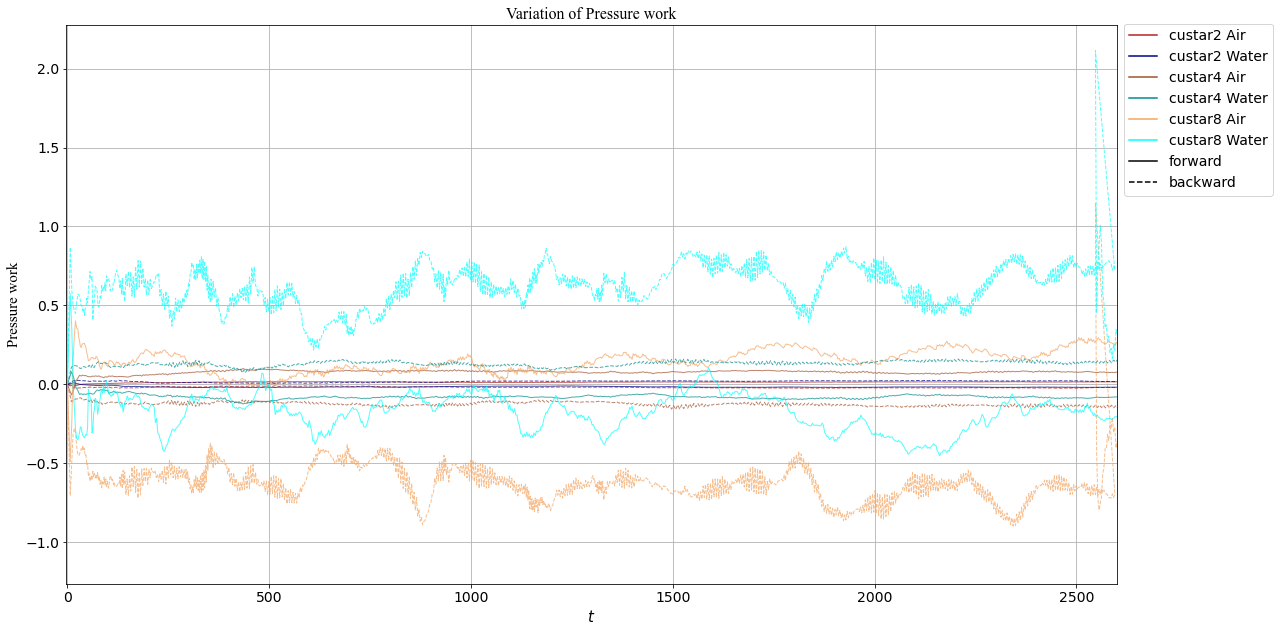

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
hfont = {'fontname':'Times New Roman'}

# Combined color palette
color_palette = {
    'custar2': ('firebrick', 'darkblue'),
    'custar4': ('sienna', 'darkcyan'),
    'custar8': ('sandybrown', 'cyan')
}

# Symbols for 'forward' and 'backward'
symbols = {
    'forward': '-',
    'backward': '--'
}

# Create the figure
fig, ax = plt.subplots(figsize=(18,9))

# Plot data for air
for df_name, df in dfs_air.items():
    t0 = df['time'][0]
    pressure = df['grad P']
    
    for custar_val, (color_air, color_water) in color_palette.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    ax.plot(df['time']-t0, pressure, symbols[direction], color=color_air, alpha=0.7, lw=1)

# Plot data for water (assuming 'dfs' contains the water data)
for df_name, df in dfs_water.items():
    t0 = df['time'][0]
    pressure = df['grad P']
    
    for custar_val, (color_air, color_water) in color_palette.items():
        if custar_val in df_name:
            break
    
    direction = 'forward' if 'forward' in df_name else 'backward'
    ax.plot(df['time']-t0, pressure, symbols[direction], color=color_water, alpha=0.7, lw=1)

# Create handles for 'air' and 'water' for each custar value
handles = []

for custar_val, (color_air, color_water) in color_palette.items():
    handles.append(plt.Line2D([0], [0], color=color_air, label=f"{custar_val} Air"))
    handles.append(plt.Line2D([0], [0], color=color_water, label=f"{custar_val} Water"))

# Add handles for directions (i.e., 'forward' and 'backward')
handles += [plt.Line2D([0], [0], color='black', linestyle=symbols[dir], label=dir) for dir in symbols]

ax.legend(handles=handles, loc="upper left",bbox_to_anchor=(1, 1.015))


# Set other plot details
ax.set_xlabel(r'$t$', **hfont, fontsize=15)
ax.set_ylabel(r'Pressure work', **hfont, fontsize=15)
ax.set_title(r'Variation of Pressure work', **hfont, fontsize=16)
ax.set_xlim([-3,2600])
ax.grid(True)

# Ajustar el espacio para que la leyenda no se corte
plt.tight_layout()

plt.show()


In [35]:
# List of custar values to be considered
valores_custar = [2, 4, 8]

# List of directions to be considered
direcciones = ['forward', 'backward']

# List of environments and coordinates to consider
environments = ['air', 'water']
coordinates = ['x', 'y', 'z']

# Names of the columns for the data
columns = ['istep', 'time', 'vel_vu', 'vel_w', 'gradp', 'gradp1', 'divu', 'divu1', 'new']
#columns = ['istep', 'time', 'vel_vu', 'vel_w', 'gradp']  # Alternative set of columns

# Dictionary to store DataFrames for each combination of parameters
dfs_mom = {}

# Loop through each custar value
for custar in valores_custar:
    # Loop through each direction
    for direccion in direcciones:
        # Loop through each environment
        for env in environments:
            # Loop through each coordinate
            for coord in coordinates:
                # Construct the filename for this combination of parameters
                filename_glo = f'ak0.2_Bo200_custar{custar}/{direccion}/budgets/mom_bud_{coord}_{env}.out'
                print(filename_glo) 
                
                # Load the data from the file
                moment_budget = np.loadtxt(filename_glo)
                
                # Create a DataFrame from the loaded data with the specified columns
                df_name = f'df_mom_budget_{coord}_{env}_custar{custar}_{direccion}'
                dfs_mom[df_name] = pd.DataFrame(moment_budget, columns=columns)


ak0.2_Bo200_custar2/forward/budgets/mom_bud_x_air.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_y_air.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_z_air.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_x_water.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_y_water.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_z_water.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_x_air.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_y_air.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_z_air.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_x_water.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_y_water.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_z_water.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_x_air.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_y_air.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_z_air.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_x_water.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_y_water.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_z_water.out
ak0.

2 forward air x


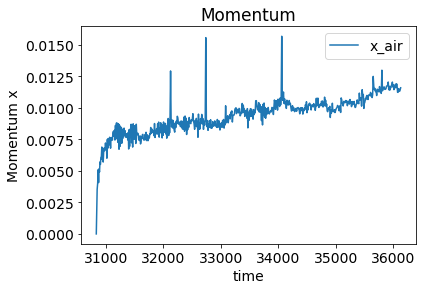

2 forward air y


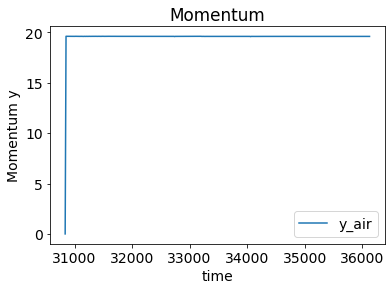

2 forward air z


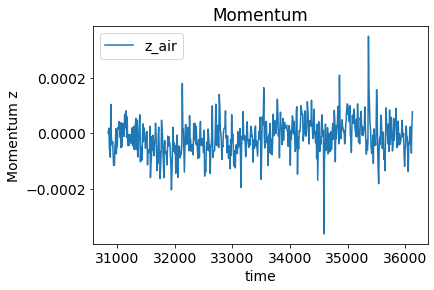

2 forward water x


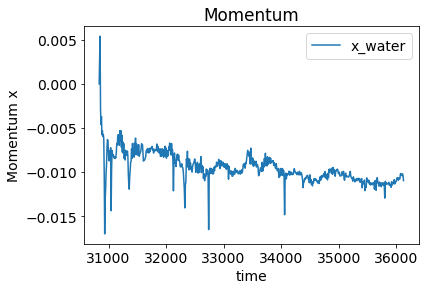

2 forward water y


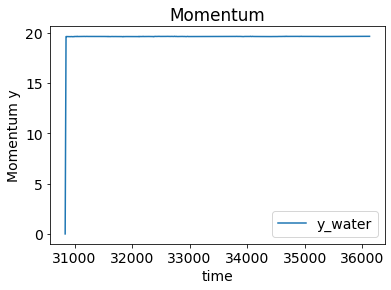

2 forward water z


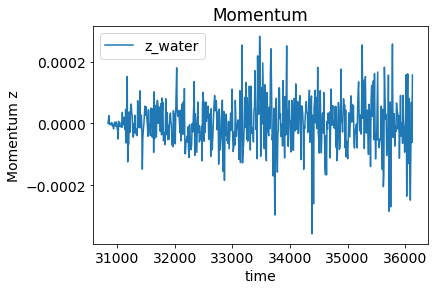

2 backward air x


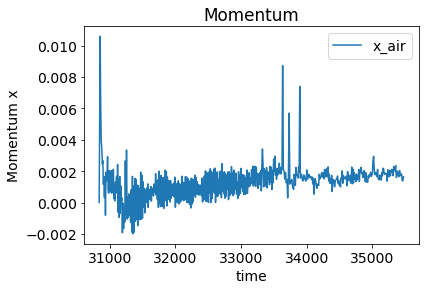

2 backward air y


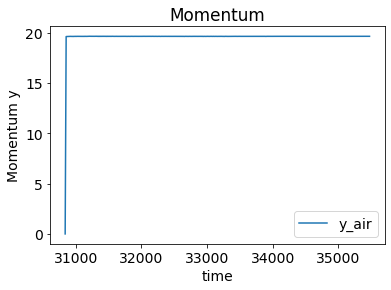

2 backward air z


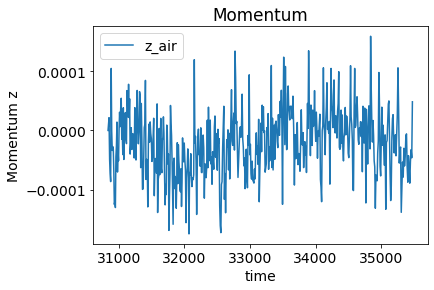

2 backward water x


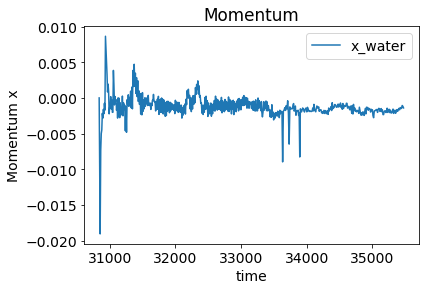

2 backward water y


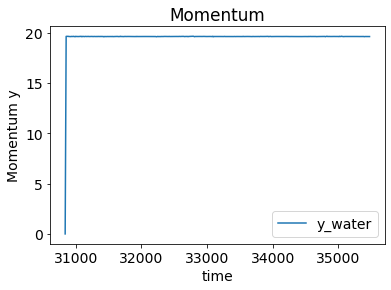

2 backward water z


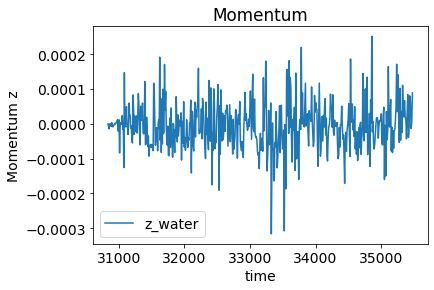

4 forward air x


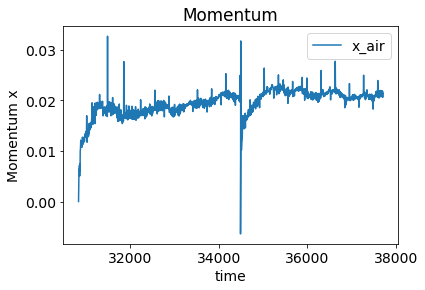

4 forward air y


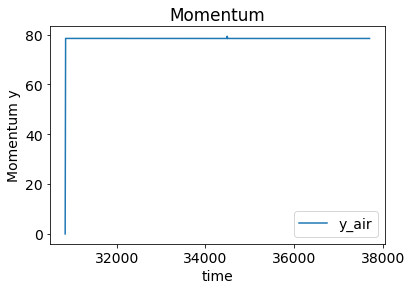

4 forward air z


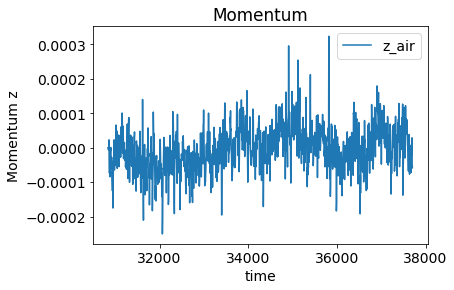

4 forward water x


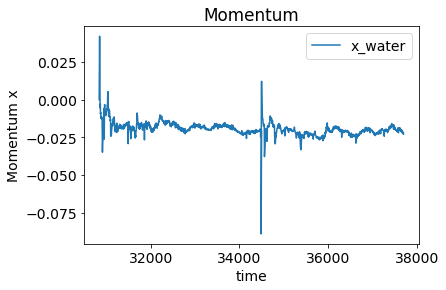

4 forward water y


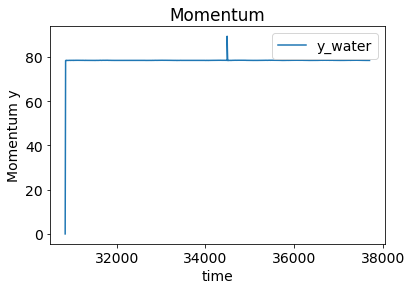

4 forward water z


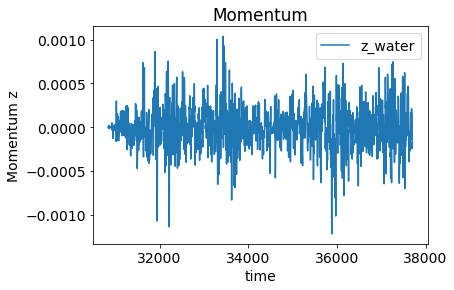

4 backward air x


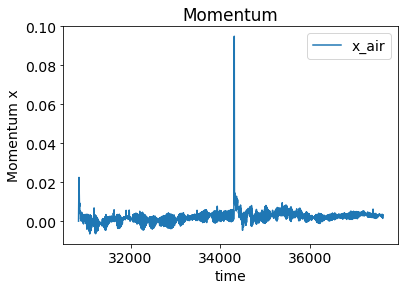

4 backward air y


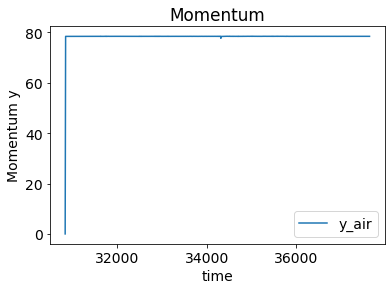

4 backward air z


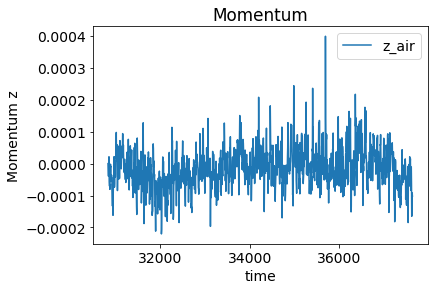

4 backward water x


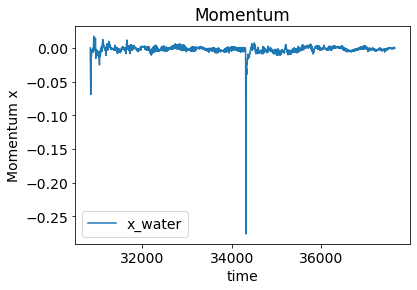

4 backward water y


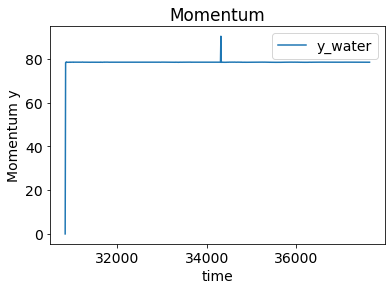

4 backward water z


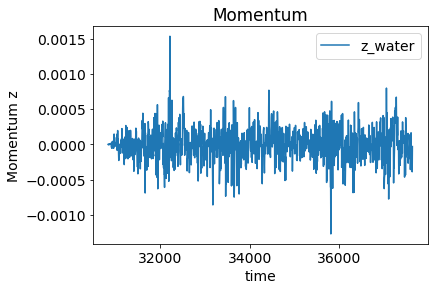

8 forward air x


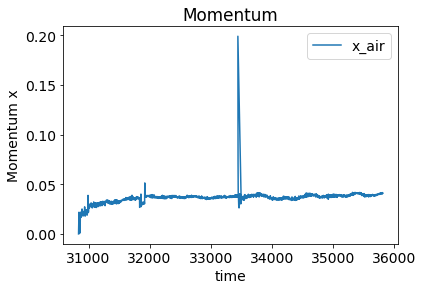

8 forward air y


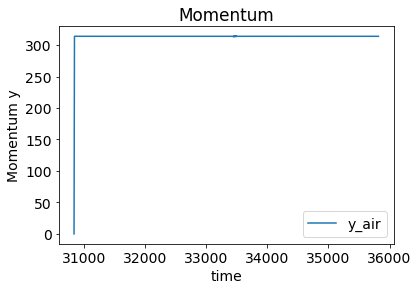

8 forward air z


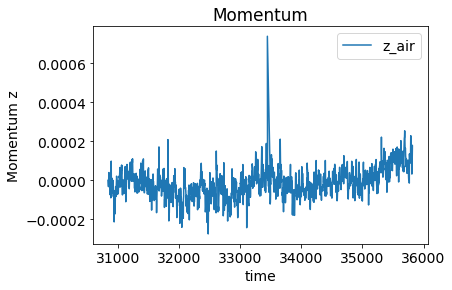

8 forward water x


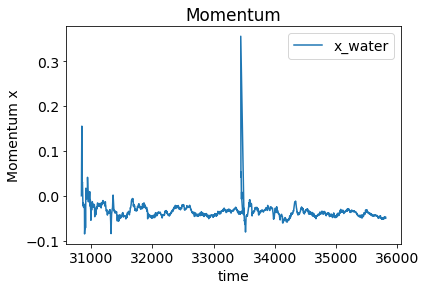

8 forward water y


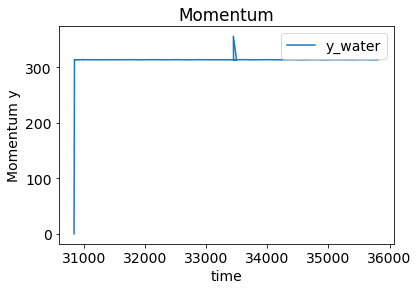

8 forward water z


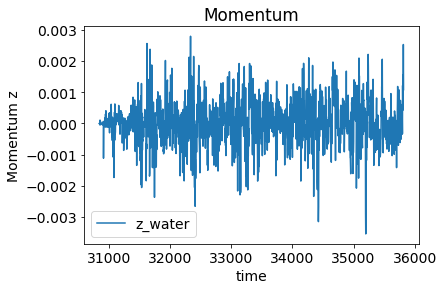

8 backward air x


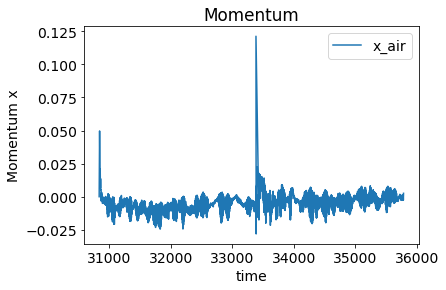

8 backward air y


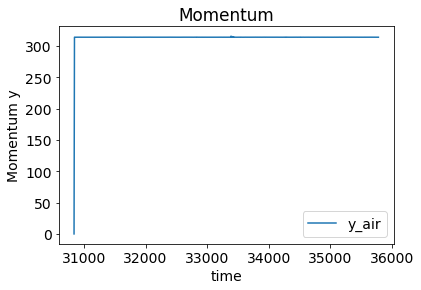

8 backward air z


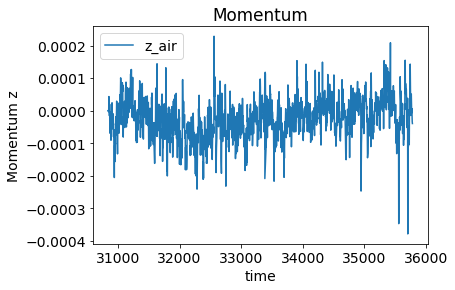

8 backward water x


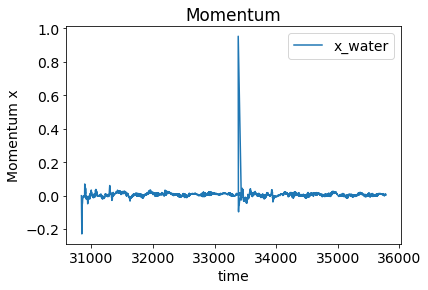

8 backward water y


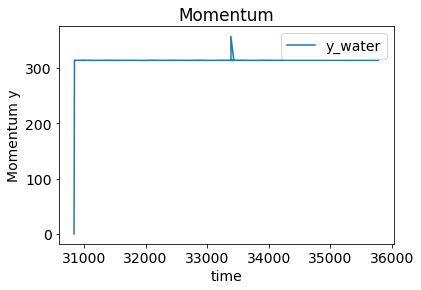

8 backward water z


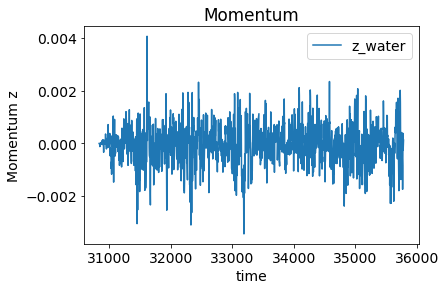

In [36]:
# Define las combinaciones

valores_custar = [2, 4, 8]

# Lista de direcciones a considerar
direcciones = ['forward', 'backward']

# Lista de entornos y coordenadas
environments = ['air', 'water']
coordinates = ['x', 'y', 'z']

for custar in valores_custar:
    for direccion in direcciones:
        for env in environments:
            for coord in coordinates:
                print(custar, direccion, env, coord)
                # Obtén el DataFrame correspondiente a esta combinación
                df_name = f'df_mom_budget_{coord}_{env}_custar{custar}_{direccion}'
                df = dfs_mom[df_name]
                
                # Crea la gráfica
                plt.figure()
                plt.plot(df['time'], df['gradp'], label=f'{coord}_{env}')
                plt.xlabel('time')
                plt.ylabel(f'Momentum {coord}')
                plt.title(f'Momentum')
                plt.legend()
                
                # Guarda la gráfica si es necesario
                # plt.savefig(f'momento_vs_posicion_{coord}_{env}_custar{custar}_{direccion}.png')
                
                # Muestra la gráfica
                plt.show()


In [37]:
# Lista de valores de custar a considerar
valores_custar = [2, 4, 8]

# Lista de direcciones a considerar
direcciones = ['forward', 'backward']

# Lista de entornos y coordenadas
environments = ['tot']
coordinates = ['x', 'y', 'z']

# Column names for the data
columns = ['istep', 'time', 'mom_m', 'sur_t', '5']

# Diccionario para almacenar DataFrames de cada combinación
dfs_mom = {}

for custar in valores_custar:
    for direccion in direcciones:
        for env in environments:
            for coord in coordinates:
                # Construye el filename_glo para esta combinación
                filename_glo = f'ak0.2_Bo200_custar{custar}/{direccion}/budgets/mom_bud_{coord}_{env}.out'
                print(filename_glo)
                # Carga los datos
                moment_budget = np.loadtxt(filename_glo)
                
                # Crea el DataFrame
                df_name = f'df_mom_budget_{coord}_{env}_custar{custar}_{direccion}'
                dfs_mom[df_name] = pd.DataFrame(moment_budget, columns=columns)


ak0.2_Bo200_custar2/forward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar2/forward/budgets/mom_bud_z_tot.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar2/backward/budgets/mom_bud_z_tot.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar4/forward/budgets/mom_bud_z_tot.out
ak0.2_Bo200_custar4/backward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar4/backward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar4/backward/budgets/mom_bud_z_tot.out
ak0.2_Bo200_custar8/forward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar8/forward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar8/forward/budgets/mom_bud_z_tot.out
ak0.2_Bo200_custar8/backward/budgets/mom_bud_x_tot.out
ak0.2_Bo200_custar8/backward/budgets/mom_bud_y_tot.out
ak0.2_Bo200_custar8/backward/budgets/mom_bud_z_tot.out


2 forward tot x


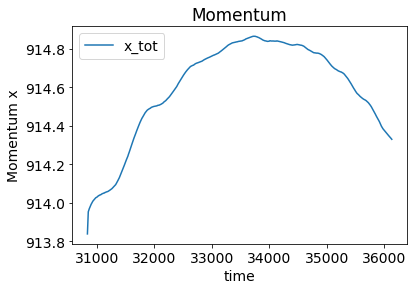

2 forward tot y


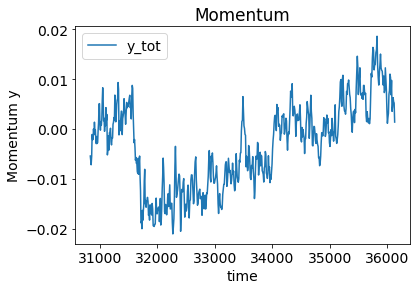

2 forward tot z


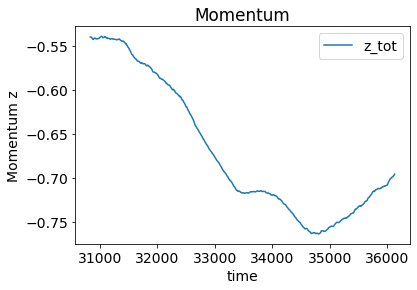

2 backward tot x


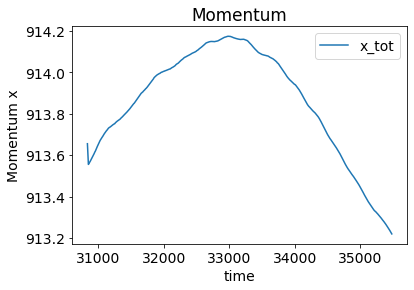

2 backward tot y


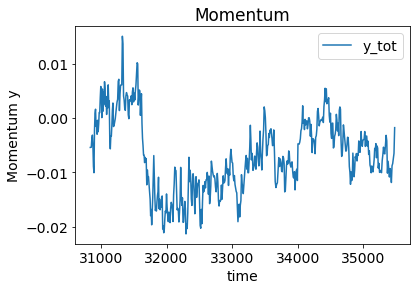

2 backward tot z


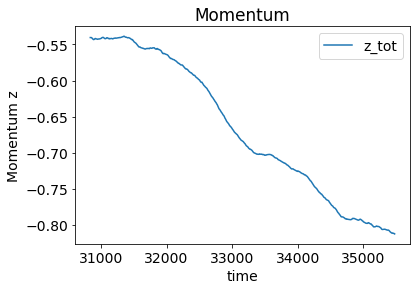

4 forward tot x


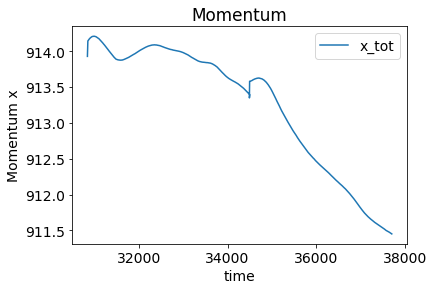

4 forward tot y


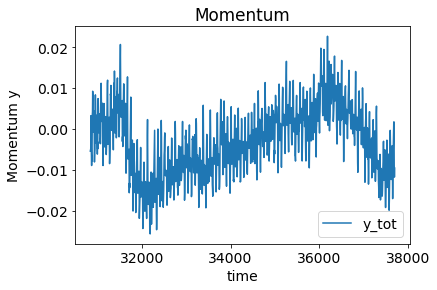

4 forward tot z


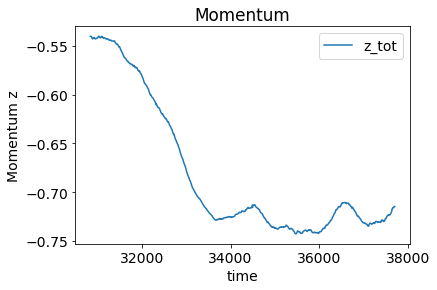

4 backward tot x


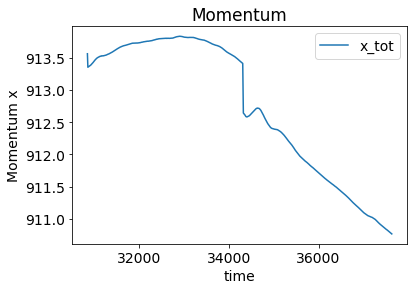

4 backward tot y


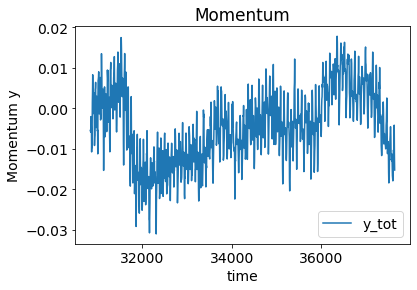

4 backward tot z


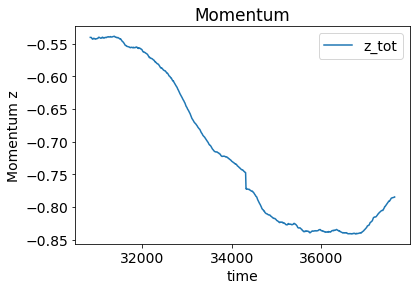

8 forward tot x


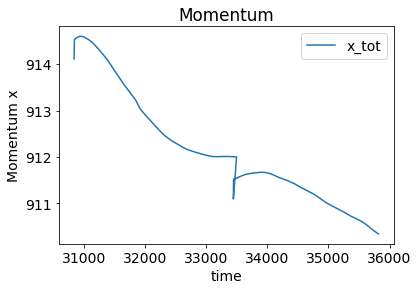

8 forward tot y


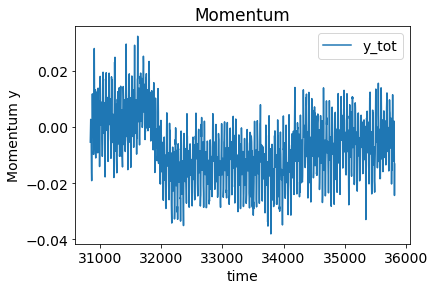

8 forward tot z


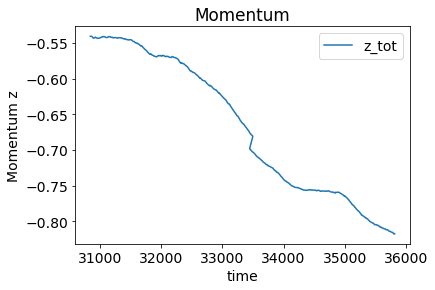

8 backward tot x


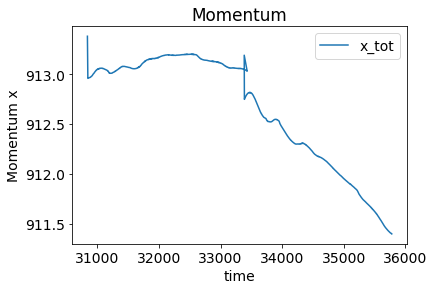

8 backward tot y


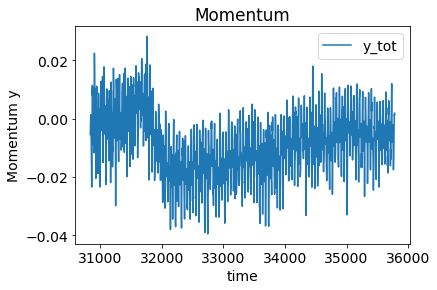

8 backward tot z


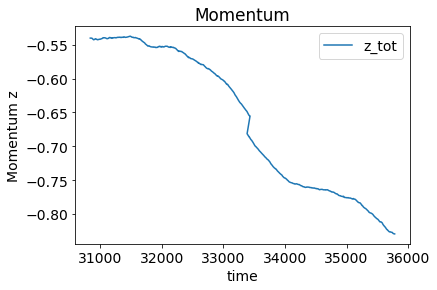

In [38]:
for custar in valores_custar:
    for direccion in direcciones:
        for env in environments:
            for coord in coordinates:
                print(custar, direccion, env, coord)
                # Obtén el DataFrame correspondiente a esta combinación
                df_name = f'df_mom_budget_{coord}_{env}_custar{custar}_{direccion}'
                df = dfs_mom[df_name]
                
                # Crea la gráfica
                plt.figure()
                plt.plot(df['time'], df['mom_m'], label=f'{coord}_{env}')
                plt.xlabel('time')
                plt.ylabel(f'Momentum {coord}')
                plt.title(f'Momentum')
                plt.legend()
                
                # Guarda la gráfica si es necesario
                # plt.savefig(f'momento_vs_posicion_{coord}_{env}_custar{custar}_{direccion}.png')
                
                # Muestra la gráfica
                plt.show()

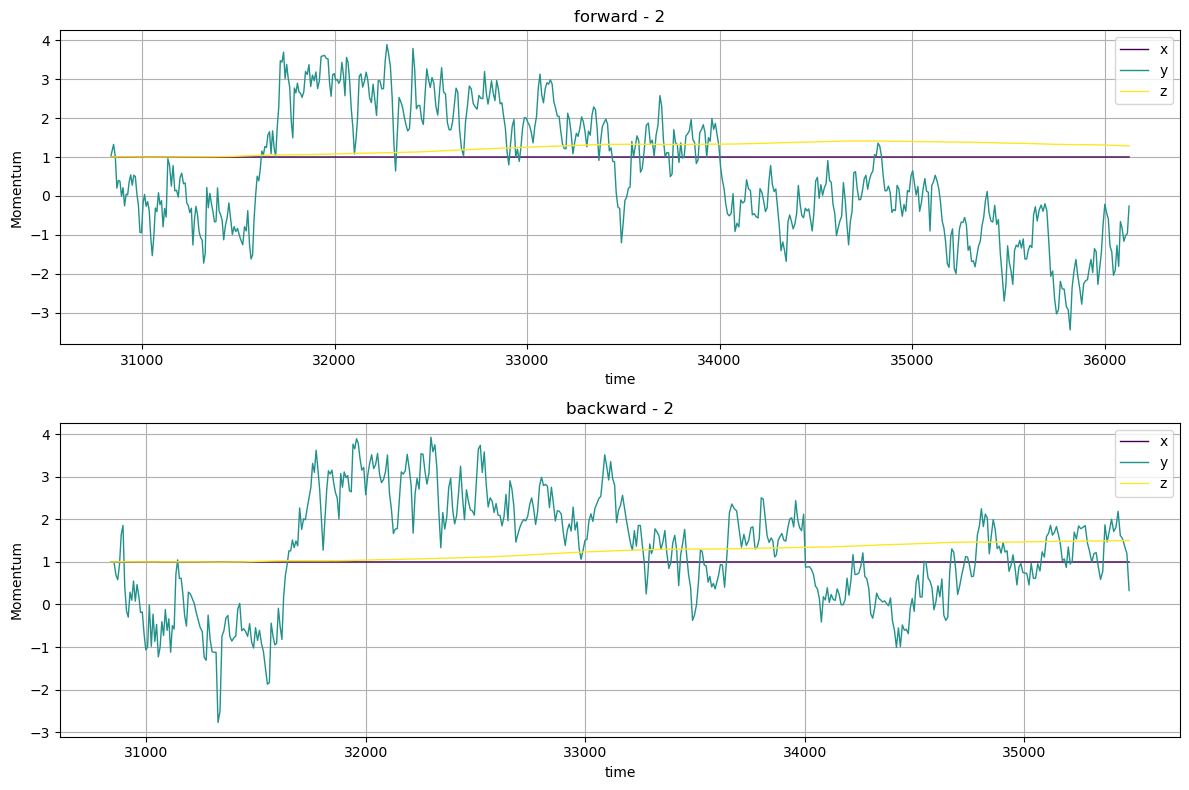

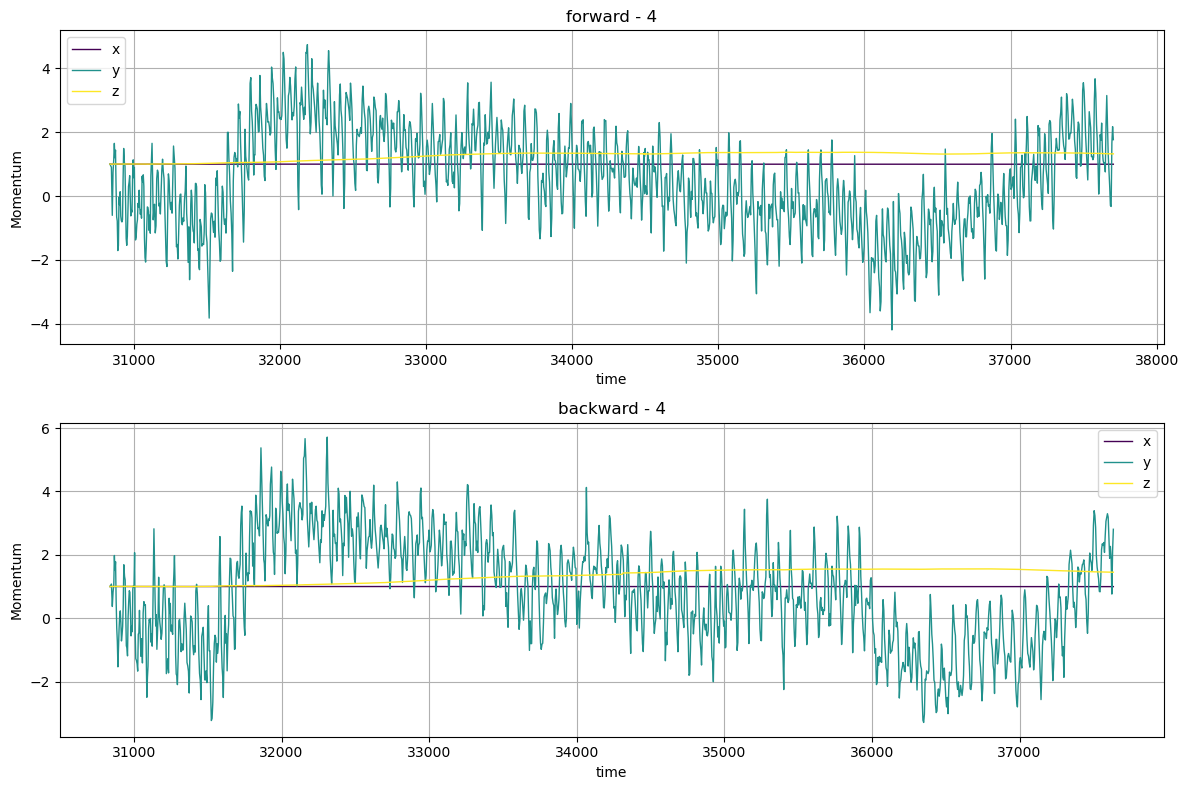

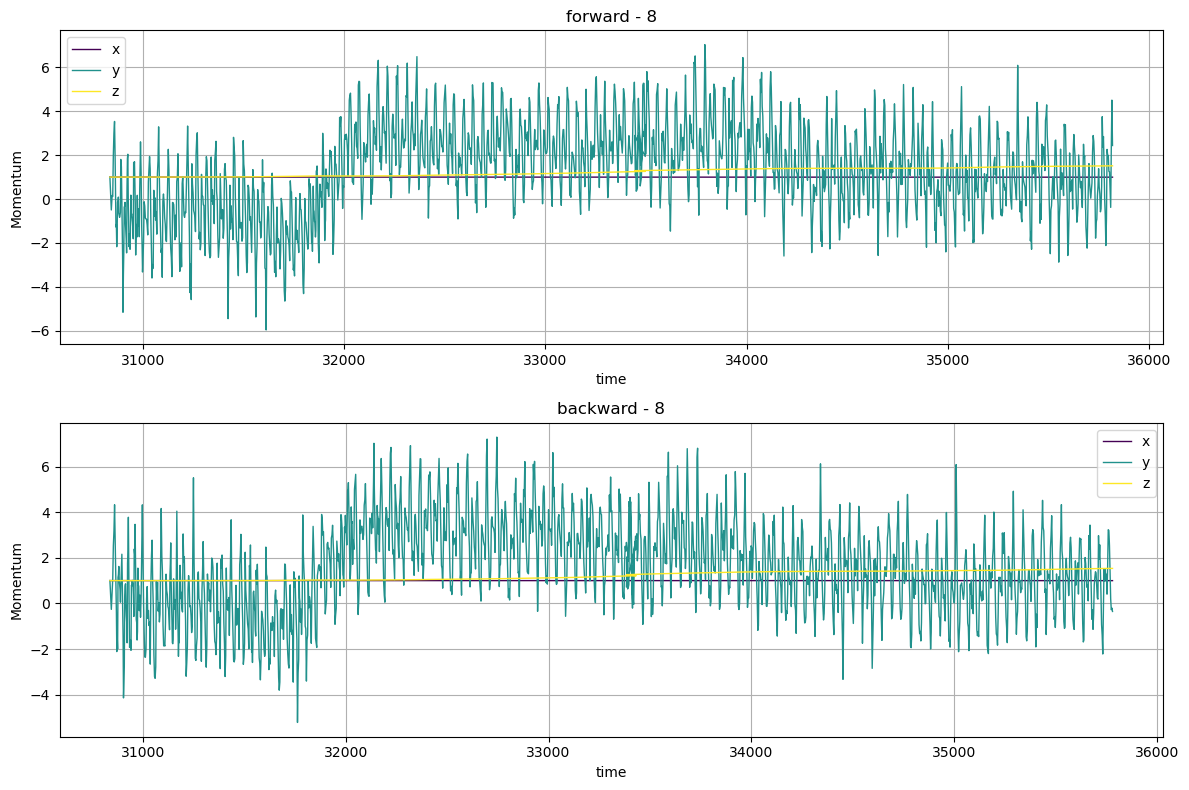

In [39]:
import matplotlib.pyplot as plt
import numpy as np

coordinates = ['x','y', 'z']
plt.style.use('default')


colors = plt.cm.viridis(np.linspace(0, 1, len(coordinates)))
# Bucle para cada caso de custar
for custar in valores_custar:
    # Crear una figura con subplots para cada combinación de dirección, entorno y coordenada
    fig, axes = plt.subplots(len(direcciones), len(environments), figsize=(12, 8))
    
    for i, direccion in enumerate(direcciones):
        for j, env in enumerate(environments):
            # Crear una lista para almacenar las leyendas
            legends = []
            
            # Selecciona el eje adecuado basado en la dimensionalidad
            if axes.ndim == 1:
                if len(direcciones) == 1:
                    ax = axes[j]
                elif len(environments) == 1:
                    ax = axes[i]
            else:
                ax = axes[i, j]
            
            for k, coord in enumerate(coordinates):
                # Obtén el DataFrame correspondiente a esta combinación
                df_name = f'df_mom_budget_{coord}_{env}_custar{custar}_{direccion}'
                df = dfs_mom[df_name]
                
                # Trazar el momento en el eje correspondiente
                ax.plot(df['time'], df['mom_m']/(df['mom_m'][0]), label=f'{coord}', color=colors[k], linestyle='-', lw= 1)
                legends.append(f'{coord}')
            
            # Configurar título y leyendas
            ax.set_title(f'{direccion} - {custar}')
            ax.set_xlabel('time')
            ax.set_ylabel('Momentum')
            #ax.set_yscale('log')
            ax.legend(legends)
            ax.grid(True)
    
    # Ajustar espaciado y mostrar la figura para este caso de custar
    plt.tight_layout()
    plt.grid(True)
    plt.show()


/tmp/ipykernel_2389360/1735858736.py:55: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


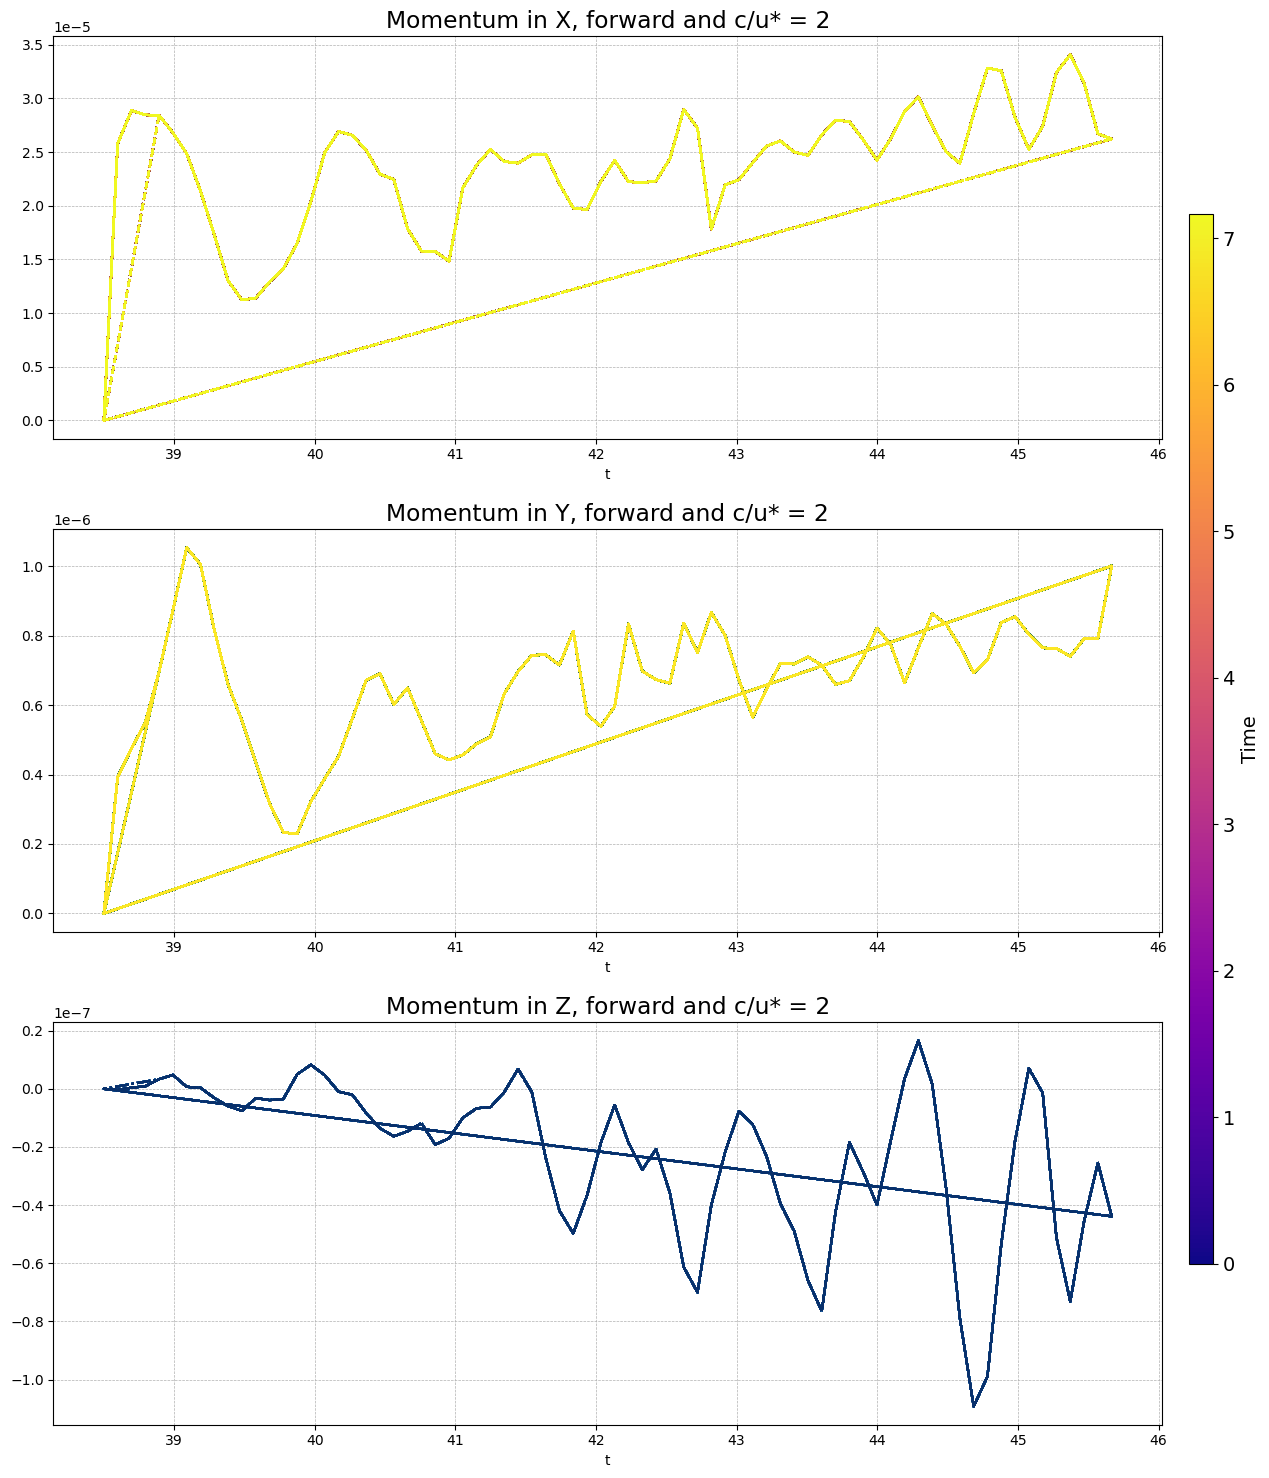

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Datos
istep = df_glo_obs_forward_custar2['istep']
time = df_glo_obs_forward_custar2['time']
direction = "forward"
custar_suffix = 2

# Configuración de la figura y ejes
fig, axs = plt.subplots(3, 1, figsize=(12, 15))  # 3 subgráficas en una columna
plt.rcParams['font.size'] = 14
plt.rcParams['savefig.dpi'] = 300

# Configuración del colormap y normalización para los valores de tiempo
cmap_px = plt.cm.plasma
cmap_py = plt.cm.viridis
cmap_pz = plt.cm.Blues

norm_time = plt.Normalize(min(time), max(time))

for i, t in zip(istep, time):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"glo_obs_post__{direction}_{custar_suffix}.out" #(1.0*istep, time, ak, mf_px, mf_py, mf_pz, en_p, en_v)
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        time = data_wf[:, 1]
        mf_px = data_wf[:, 3]
        mf_py = data_wf[:, 4]
        mf_pz = data_wf[:, 5]
        
        
        
        axs[0].plot(time, mf_px, color=cmap_px(norm_time(t)), linestyle='--')
        axs[1].plot(time, mf_py, color=cmap_py(norm_time(t)), linestyle='-')
        axs[2].plot(time, mf_pz, color=cmap_pz(norm_time(t)), linestyle='-.')

# Configuración final de las gráficas
axs[0].set_title(f'Momentum in X, {direction} and c/u* = {custar_suffix}')
axs[1].set_title(f'Momentum in Y, {direction} and c/u* = {custar_suffix}')
axs[2].set_title(f'Momentum in Z, {direction} and c/u* = {custar_suffix}')

# Set x labels
for ax in axs:
    ax.set_xlabel("t")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Barra de colores que refleja el tiempo en la última gráfica
sm = plt.cm.ScalarMappable(cmap=cmap_px, norm=norm_time)  # Usando cmap_px como ejemplo
sm.set_array([])
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(sm, cax=cbar_ax, label="Time")

plt.tight_layout()
plt.show()

/tmp/ipykernel_2389360/1566261204.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


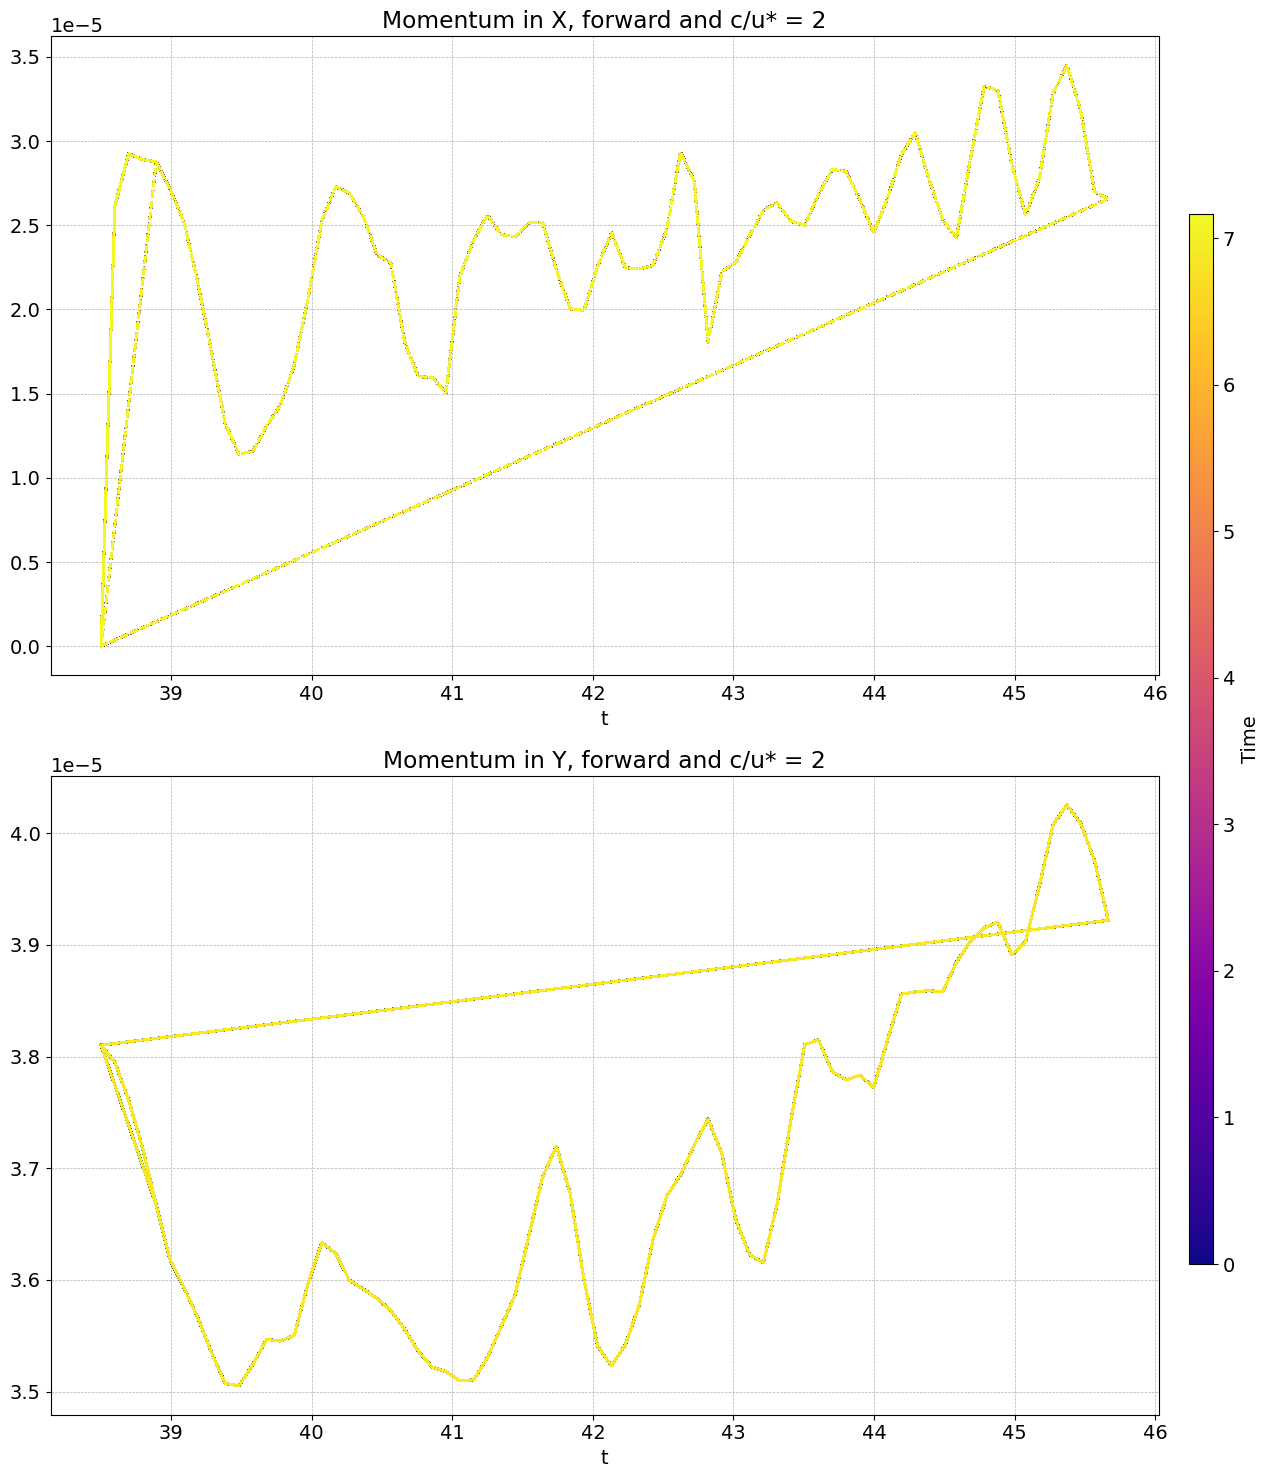

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Datos
istep = df_glo_obs_forward_custar2['istep']
time = df_glo_obs_forward_custar2['time']
direction = "forward"
custar_suffix = 2

# Configuración de la figura y ejes
fig, axs = plt.subplots(2, 1, figsize=(12, 15))  # 3 subgráficas en una columna
plt.rcParams['font.size'] = 14
plt.rcParams['savefig.dpi'] = 300

# Configuración del colormap y normalización para los valores de tiempo
cmap_px = plt.cm.plasma
cmap_py = plt.cm.viridis
cmap_pz = plt.cm.Blues

norm_time = plt.Normalize(min(time), max(time))

for i, t in zip(istep, time):
    formatted_i = f"{int(i):09d}" 
    filename_wf = f"glo_obs_post_alt__{direction}_{custar_suffix}.out" #1.0*istep, time, mf_px_alt, mf_vx_alt
    if os.path.exists(filename_wf):
        data_wf = np.loadtxt(filename_wf)
        time = data_wf[:, 1]
        mf_press = data_wf[:, 2]
        mf_vis = data_wf[:, 3]
        
        axs[0].plot(time, mf_press, color=cmap_px(norm_time(t)), linestyle='--')
        axs[1].plot(time, mf_vis, color=cmap_py(norm_time(t)), linestyle='-')

# Configuración final de las gráficas
axs[0].set_title(f'Momentum in X, {direction} and c/u* = {custar_suffix}')
axs[1].set_title(f'Momentum in Y, {direction} and c/u* = {custar_suffix}')

# Set x labels
for ax in axs:
    ax.set_xlabel("t")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Barra de colores que refleja el tiempo en la última gráfica
sm = plt.cm.ScalarMappable(cmap=cmap_px, norm=norm_time)  # Usando cmap_px como ejemplo
sm.set_array([])
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(sm, cax=cbar_ax, label="Time")

plt.tight_layout()
plt.show()

